#**PROJECT KAPITA SELEKTA FISIKA KOMPUTASI 119**#

##**"Identifikasi Konsumsi Energi pada Industri Baja Skala Kecil di Era Kota Pintar: Pendekatan Berbasis Data"**##
#####**Dosen Pengampu : Dr. Bambang Heru Iswanto, M. Si**



---



```
# KELOMPOK 1 #
1.   Farhan Aqil Musyafa - 1306621075
2.   Dhinar Hidayath - 1306621054
3.   Puspa Zuhrotul Kamilah - 1306621058
```



---



## **A. Latar Belakang**
---
  Dalam lanskap industri kontemporer, integrasi teknologi pintar menjadi kunci untuk mengoptimalkan proses dan pemanfaatan sumber daya. Dalam konteks ini, industri baja skala kecil memainkan peran penting, seperti yang dicontohkan oleh entitas seperti DAEWOO Steel Co. Ltd di Gwangyang, Korea Selatan. Industri ini, di tengah produksi berbagai produk baja dan besi, telah merangkul era teknologi pintar dengan menggabungkan analisis data untuk meningkatkan efisiensi operasional.

  Fokus dari studi ini terpusat pada dinamika konsumsi energi dari DAEWOO Steel Co. Ltd. Data yang relevan dikumpulkan secara sistematis dan disimpan dalam sistem berbasis awan, memberikan pandangan komprehensif terhadap konsumsi listrik. Situs web Korea Electric Power Corporation menjadi repositori untuk informasi berharga ini, menyediakan platform untuk analisis pola konsumsi energi secara harian, bulanan, dan tahunan.

## **B. Permasalahan**
---
  Saat ini, industri mendukung pemodelan dan analisis data dalam paradigma kota pintar. Seperti yang dicontohkan oleh DAEWOO Steel Co. Ltd, industri menuntut model analisis data untuk energi yang canggih dan efisien. Hal ini juga didukung oleh penelitian yang dilakukan oleh Sathishkumar V E, Changsun Shin, dan Yongyun Cho pada tahun 2021 di Building Research & Information.

  Meskipun terdapat kemajuan, ada kebutuhan untuk penyempurnaan dan adaptasi lebih lanjut dari pemodelan dan analisis data ini terhadap konteks unik industri baja skala kecil. Rumitnya produksi baja, dikombinasikan dengan sifat dinamis kebutuhan energi, menuntut pendekatan khusus. Oleh karena itu, tujuan dari studi ini adalah untuk menutup kesenjangan ini dengan melakukan pemodelan dan analisis data energi yang efektif dan efisien yang disesuaikan dengan nuansa bangunan industri yang mendukung analisis data dalam kerangka kota pintar, dengan menggunakan data yang dikumpulkan dari DAEWOO Steel Co. Ltd di Gwangyang, Korea Selatan. Melalui upaya ini, kami bertujuan untuk berkontribusi pada pengelolaan sumber daya energi yang berkelanjutan dan cerdas di sektor industri, mendorong paradigma operasi cerdas dan ramah lingkungan.


## **C. Metode Penyelesaian**
---
Dalam menanggapi permasalahan kompleks konsumsi energi pada industri baja skala kecil, kami merancang pendekatan metodologi yang komprehensif. Berikut adalah daftar besar analisis yang kami terapkan:
1.   Eksplorasi Data
2.   Pemodelan
2.   Ekstraksi Fitur
3.   Reduksi Dimensi

## **D. Hasil Komputasi**
---

### ***Import Library***

In [ ]:
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import sympy as sp
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from numpy.fft import fft
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from gensim import corpora
from gensim.models import LdaModel
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import mean_squared_error
from tabulate import tabulate
from scipy.fft import fft, ifft, fftfreq
from scipy.stats import ks_2samp

### **1. Eksplorasi Data**

In [ ]:
main_data = pd.read_csv("Steel_industry_data.csv")

main_data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [ ]:
missing_counts = main_data.isna().sum()
print(missing_counts)

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64


<Axes: >

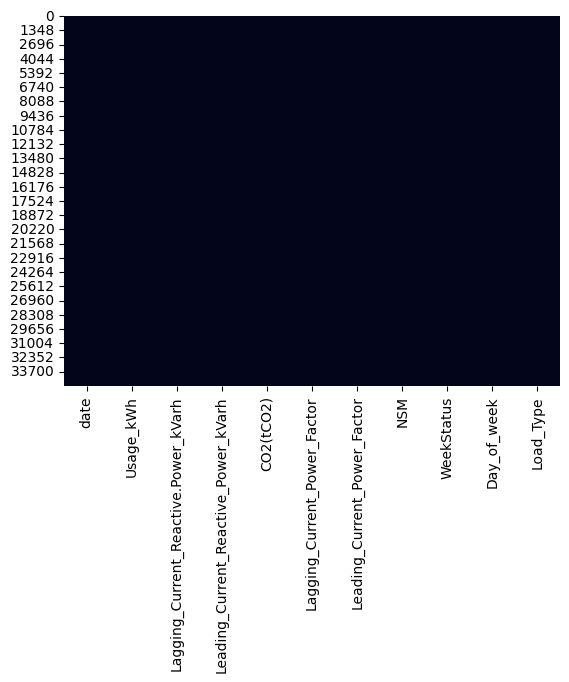

In [ ]:
sns.heatmap(main_data.isnull(), cbar = False)

_"Berdasarkan pengecekan missing values, diketahui bahwa dataset ini tidak memiliki missing values. Pengecekan secara numerik menunjukkan bahwa semua features tidak memiliki jumlah missing values (bernilai nol), sedangkan pengecekan secara visual menunjukkan bahwa semua features tidak memiliki area berwarna putih yang menunjukkan missing values. Dengan demikian, eksplorasi data lebih lanjut dapat dilakukan'_

In [ ]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [ ]:
main_data['date'] = pd.to_datetime(main_data['date'])

In [ ]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  35040 non-null  datetime64[ns]
 1   Usage_kWh                             35040 non-null  float64       
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64       
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64       
 4   CO2(tCO2)                             35040 non-null  float64       
 5   Lagging_Current_Power_Factor          35040 non-null  float64       
 6   Leading_Current_Power_Factor          35040 non-null  float64       
 7   NSM                                   35040 non-null  int64         
 8   WeekStatus                            35040 non-null  object        
 9   Day_of_week                           35040 non-null  object        
 10

_"Proses tersebut menunjukkan bahwa data format date telah berhasil dikonversi ke data type datetime yang merepresentasikan tanggal"_

In [ ]:
main_data_describe = main_data.describe()

main_data_describe

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [ ]:
print(main_data.columns)

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')


In [ ]:
kolom_mean_max = main_data_describe.loc['mean'].idxmax()
kolom_mean_min = main_data_describe.loc['mean'].idxmin()

kolom_std_max = main_data_describe.loc['std'].idxmax()
kolom_std_min = main_data_describe.loc['std'].idxmin()

mean_max = main_data_describe.loc['mean', kolom_mean_max]
mean_min = main_data_describe.loc['mean', kolom_mean_min]

std_max = main_data_describe.loc['std', kolom_std_max]
std_min = main_data_describe.loc['std', kolom_std_min]

print(f"Kolom dengan mean terbesar: {kolom_mean_max} ({mean_max:.2f})")
print(f"Kolom dengan mean terkecil: {kolom_mean_min} ({mean_min:.2f})")
print(f"Kolom dengan standar deviasi terbesar: {kolom_std_max} ({std_max:.2f})")
print(f"Kolom dengan standar deviasi terkecil: {kolom_std_min} ({std_min:.2f})")


Kolom dengan mean terbesar: NSM (42750.00)
Kolom dengan mean terkecil: CO2(tCO2) (0.01)
Kolom dengan standar deviasi terbesar: NSM (24940.53)
Kolom dengan standar deviasi terkecil: CO2(tCO2) (0.02)


_"Berdasarkan hasil tersebut, diketahui adanya kesesuaian antara feature dengan standar deviasi dan mean dalam ukuran terbesar atau terkecil. Pada dataset ini, semakin besar nilai rata-rata akan membuat standar deviasi menjadi besar, seperti pada NSM dengan rata-rata 42750.00 kWh dan standar deviasi 24940.53. Begitu pula sebaliknya, hal tersebut terjadi pada $CO_{2}$ dengan rata-rata 0.01 ppm dan standar deviasi 0.02. Selain itu, hal ini berarti bahwa keragaman distribusi suatu feature berbanding lurus dengan rata-rata dan standar deviasinya. Feature dengan tingkat keragaman tertinggi yaitu NSM, sedangkan feature dengan tingkat keragaman terendah yaitu $CO_{2}$"_

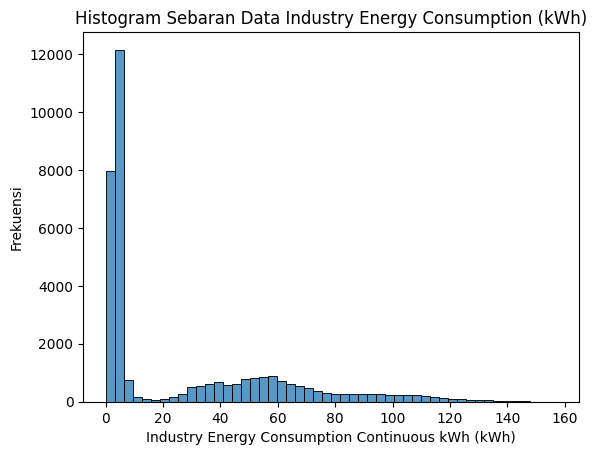

In [ ]:
sns.histplot(main_data['Usage_kWh'], bins=50)
plt.xlabel('Industry Energy Consumption Continuous kWh (kWh)')
plt.ylabel('Frekuensi')
plt.title('Histogram Sebaran Data Industry Energy Consumption (kWh)')
plt.show()

In [ ]:
# Uji Shapiro-Wilk (Uji Statistik Normalitas)
statistic, p_value = stats.shapiro(main_data['Usage_kWh'])

# Menampilkan hasil uji
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Menginterpretasikan hasil uji
alpha = 0.05  # Tingkat signifikansi
if p_value > alpha:
    print("Tidak ada cukup bukti untuk menolak hipotesis nol (data terdistribusi normal)")
else:
    print("Terdapat cukup bukti untuk menolak hipotesis nol (data tidak terdistribusi normal)")

Statistic: 0.7531504034996033
P-value: 0.0
Terdapat cukup bukti untuk menolak hipotesis nol (data tidak terdistribusi normal)


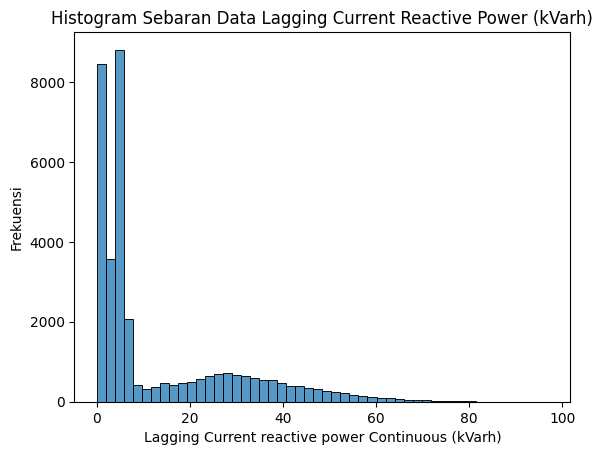

In [ ]:
sns.histplot(main_data['Lagging_Current_Reactive.Power_kVarh'], bins=50)
plt.xlabel('Lagging Current reactive power Continuous (kVarh)')
plt.ylabel('Frekuensi')
plt.title('Histogram Sebaran Data Lagging Current Reactive Power (kVarh)')
plt.show()

In [ ]:
# Uji Shapiro-Wilk (Uji Statistik Normalitas)
statistic, p_value = stats.shapiro(main_data['Lagging_Current_Reactive.Power_kVarh'])

# Menampilkan hasil uji
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Menginterpretasikan hasil uji
alpha = 0.05  # Tingkat signifikansi
if p_value > alpha:
    print("Tidak ada cukup bukti untuk menolak hipotesis nol (data terdistribusi normal)")
else:
    print("Terdapat cukup bukti untuk menolak hipotesis nol (data tidak terdistribusi normal)")

Statistic: 0.7686405777931213
P-value: 0.0
Terdapat cukup bukti untuk menolak hipotesis nol (data tidak terdistribusi normal)


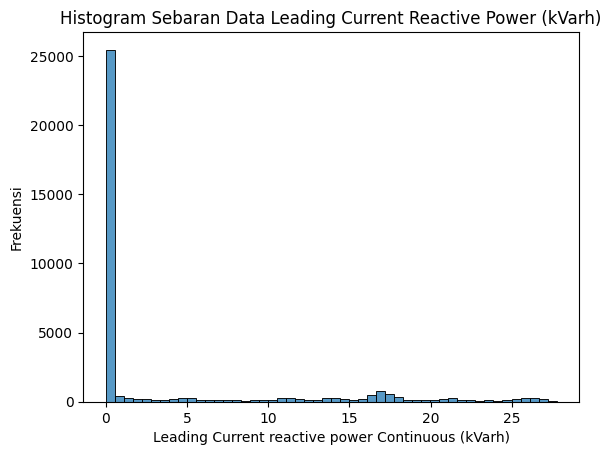

In [ ]:
sns.histplot(main_data['Leading_Current_Reactive_Power_kVarh'], bins=50)
plt.xlabel('Leading Current reactive power Continuous (kVarh)')
plt.ylabel('Frekuensi')
plt.title('Histogram Sebaran Data Leading Current Reactive Power (kVarh)')
plt.show()

In [ ]:
# Uji Shapiro-Wilk (Uji Statistik Normalitas)
statistic, p_value = stats.shapiro(main_data['Leading_Current_Reactive_Power_kVarh'])

# Menampilkan hasil uji
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Menginterpretasikan hasil uji
alpha = 0.05  # Tingkat signifikansi
if p_value > alpha:
    print("Tidak ada cukup bukti untuk menolak hipotesis nol (data terdistribusi normal)")
else:
    print("Terdapat cukup bukti untuk menolak hipotesis nol (data tidak terdistribusi normal)")

Statistic: 0.5802303552627563
P-value: 0.0
Terdapat cukup bukti untuk menolak hipotesis nol (data tidak terdistribusi normal)


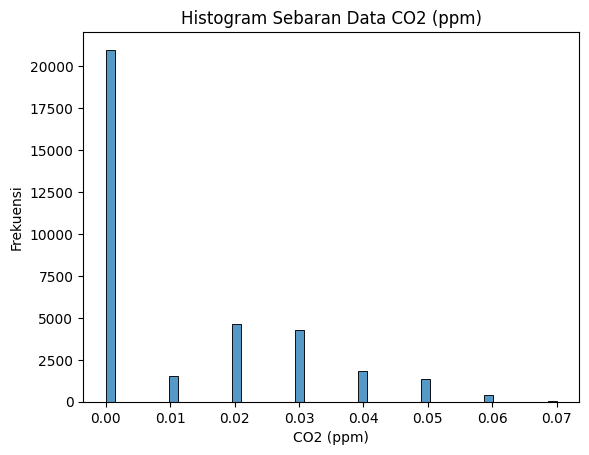

In [ ]:
sns.histplot(main_data['CO2(tCO2)'], bins=50)
plt.xlabel('CO2 (ppm)')
plt.ylabel('Frekuensi')
plt.title('Histogram Sebaran Data CO2 (ppm)')
plt.show()

In [ ]:
# Uji Shapiro-Wilk (Uji Statistik Normalitas)
statistic, p_value = stats.shapiro(main_data['CO2(tCO2)'])

# Menampilkan hasil uji
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Menginterpretasikan hasil uji
alpha = 0.05  # Tingkat signifikansi
if p_value > alpha:
    print("Tidak ada cukup bukti untuk menolak hipotesis nol (data terdistribusi normal)")
else:
    print("Terdapat cukup bukti untuk menolak hipotesis nol (data tidak terdistribusi normal)")

Statistic: 0.7307939529418945
P-value: 0.0
Terdapat cukup bukti untuk menolak hipotesis nol (data tidak terdistribusi normal)


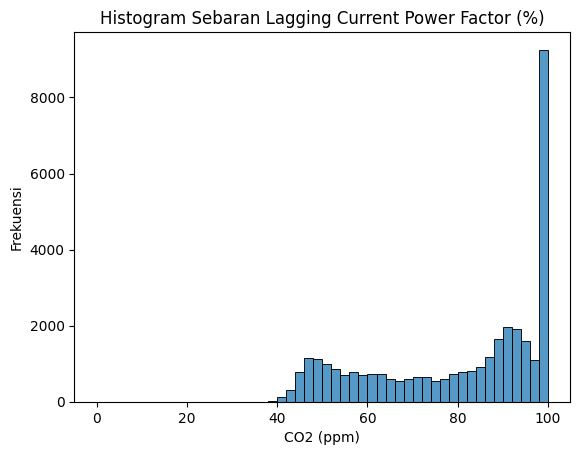

In [ ]:
sns.histplot(main_data['Lagging_Current_Power_Factor'], bins=50)
plt.xlabel('CO2 (ppm)')
plt.ylabel('Frekuensi')
plt.title('Histogram Sebaran Lagging Current Power Factor (%)')
plt.show()

In [ ]:
# Uji Shapiro-Wilk (Uji Statistik Normalitas)
statistic, p_value = stats.shapiro(main_data['CO2(tCO2)'])

# Menampilkan hasil uji
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Menginterpretasikan hasil uji
alpha = 0.05  # Tingkat signifikansi
if p_value > alpha:
    print("Tidak ada cukup bukti untuk menolak hipotesis nol (data terdistribusi normal)")
else:
    print("Terdapat cukup bukti untuk menolak hipotesis nol (data tidak terdistribusi normal)")

Statistic: 0.7307939529418945
P-value: 0.0
Terdapat cukup bukti untuk menolak hipotesis nol (data tidak terdistribusi normal)


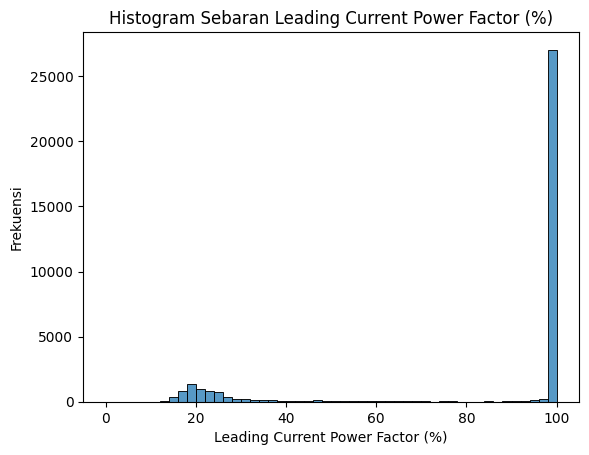

In [ ]:
sns.histplot(main_data['Leading_Current_Power_Factor'], bins=50)
plt.xlabel('Leading Current Power Factor (%)')
plt.ylabel('Frekuensi')
plt.title('Histogram Sebaran Leading Current Power Factor (%)')
plt.show()

In [ ]:
# Uji Shapiro-Wilk (Uji Statistik Normalitas)
statistic, p_value = stats.shapiro(main_data['Leading_Current_Power_Factor'])

# Menampilkan hasil uji
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Menginterpretasikan hasil uji
alpha = 0.05  # Tingkat signifikansi
if p_value > alpha:
    print("Tidak ada cukup bukti untuk menolak hipotesis nol (data terdistribusi normal)")
else:
    print("Terdapat cukup bukti untuk menolak hipotesis nol (data tidak terdistribusi normal)")

Statistic: 0.5301780700683594
P-value: 0.0
Terdapat cukup bukti untuk menolak hipotesis nol (data tidak terdistribusi normal)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


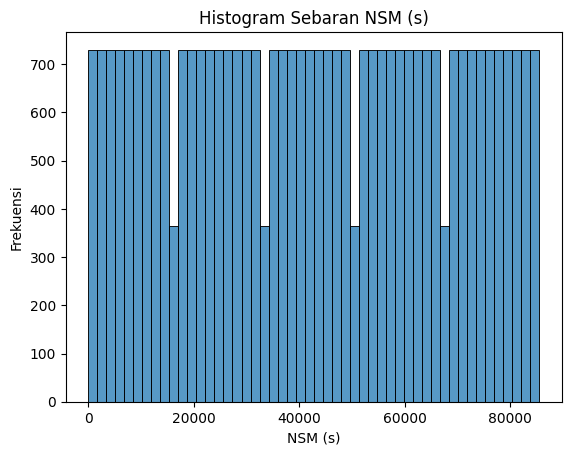

In [ ]:
sns.histplot(main_data['NSM'], bins=50)
plt.xlabel('NSM (s)')
plt.ylabel('Frekuensi')
plt.title('Histogram Sebaran NSM (s)')
plt.show()

In [ ]:
# Uji Shapiro-Wilk (Uji Statistik Normalitas)
statistic, p_value = stats.shapiro(main_data['NSM'])

# Menampilkan hasil uji
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Menginterpretasikan hasil uji
alpha = 0.05  # Tingkat signifikansi
if p_value > alpha:
    print("Tidak ada cukup bukti untuk menolak hipotesis nol (data terdistribusi normal)")
else:
    print("Terdapat cukup bukti untuk menolak hipotesis nol (data tidak terdistribusi normal)")

Statistic: 0.9546412229537964
P-value: 0.0
Terdapat cukup bukti untuk menolak hipotesis nol (data tidak terdistribusi normal)


_"Berdasarkan uji Shapiro-Wilk tersebut, diketahui bahwa semua feature tidak terdistribusi normal. Hal ini ditunjukkan dengan bentuk histogram yang tidak bell shape dan hasil uji P-value < 0,05"_

In [ ]:
print(main_data.columns)

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')


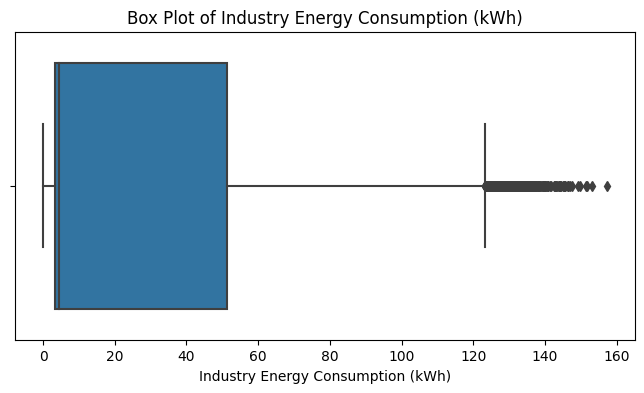

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=main_data['Usage_kWh'])
plt.xlabel('Industry Energy Consumption (kWh)')
plt.title('Box Plot of Industry Energy Consumption (kWh)')
plt.show()


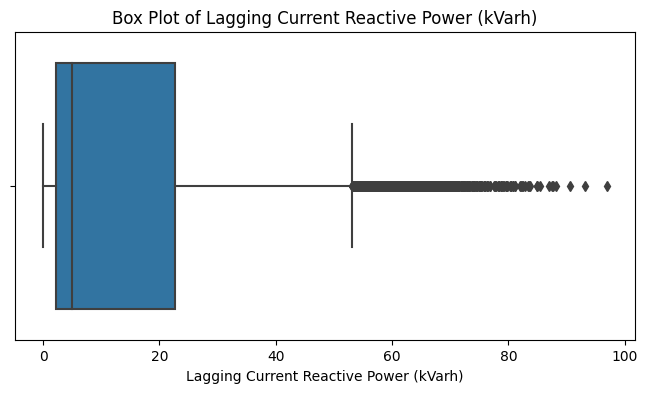

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=main_data['Lagging_Current_Reactive.Power_kVarh'])
plt.xlabel('Lagging Current Reactive Power (kVarh)')
plt.title('Box Plot of Lagging Current Reactive Power (kVarh)')
plt.show()


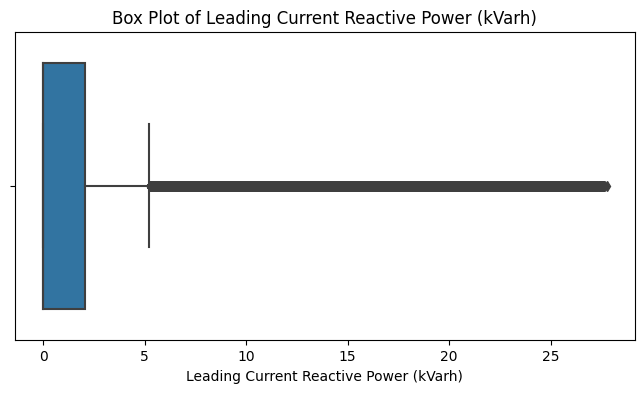

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=main_data['Leading_Current_Reactive_Power_kVarh'])
plt.xlabel('Leading Current Reactive Power (kVarh)')
plt.title('Box Plot of Leading Current Reactive Power (kVarh)')
plt.show()

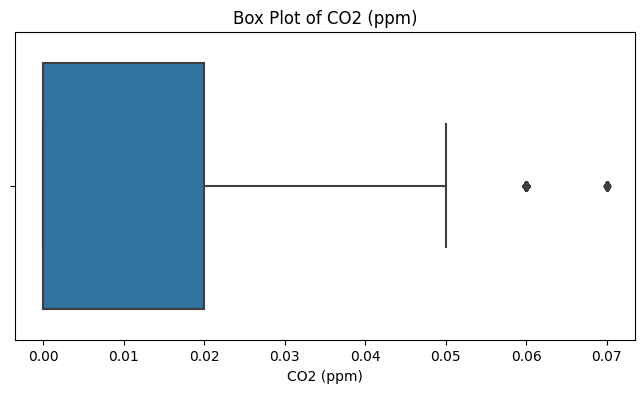

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=main_data['CO2(tCO2)'])
plt.xlabel('CO2 (ppm)')
plt.title('Box Plot of CO2 (ppm)')
plt.show()

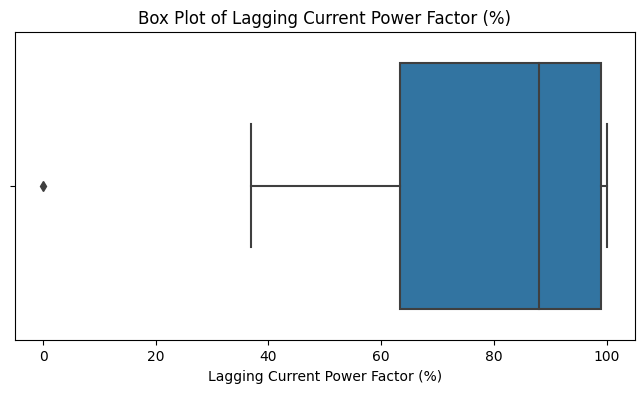

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=main_data['Lagging_Current_Power_Factor'])
plt.xlabel('Lagging Current Power Factor (%)')
plt.title('Box Plot of Lagging Current Power Factor (%)')
plt.show()

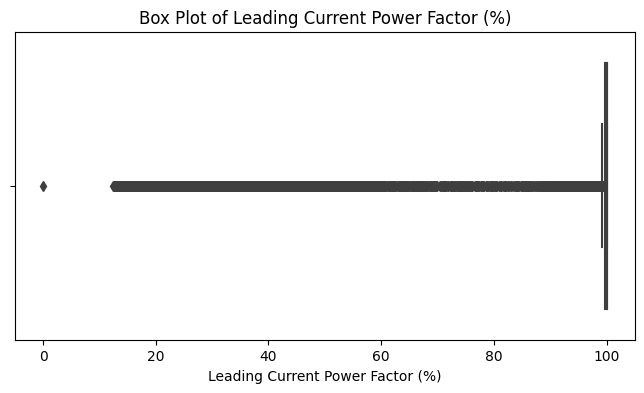

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=main_data['Leading_Current_Power_Factor'])
plt.xlabel('Leading Current Power Factor (%)')
plt.title('Box Plot of Leading Current Power Factor (%)')
plt.show()

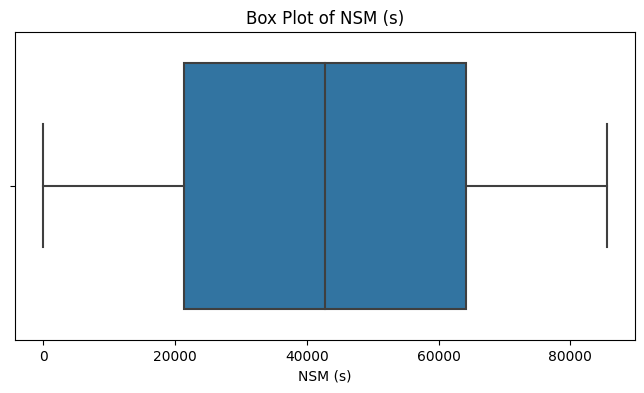

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=main_data['NSM'])
plt.xlabel('NSM (s)')
plt.title('Box Plot of NSM (s)')
plt.show()

_"Berdasarkan boxplot tersebut, feature yang tidak memiliki outlier hanya NSM"_

In [ ]:
crosstab_table = pd.crosstab(main_data['WeekStatus'], main_data['Load_Type'])

display(crosstab_table)

Load_Type,Light_Load,Maximum_Load,Medium_Load
WeekStatus,,,
Weekday,11168,5952,7936
Weekend,6904,1320,1760


_"Berdasarkan hasil tersebut, beban ringan industri yang terkecil terjadi pada hari libur, sedangkan terbesar terjadi pada hari kerja. Beban sedang industri yang terkecil terjadi pada hari libur, sedangkan terbesar terjadi pada hari kerja. Beban maksimum industri yang terkecil terjadi pada hari libur, sedangkan terbesar terjadi terjadi pada hari kerja. Uraian tersebut menunjukkan bahwa beban industri rata-rata tergolong sedang pada hari kerja, sedangkan pada hari libur, beban industri rata-rata tergolong ringan. Dengan demikian, efisiensi industri terbaik terjadi pada hari libur karena jumlah bebannya ringan yang berarti konsumsi energi juga rendah. Begitupula sebaliknya, efisiensi industri terburuk terjadi pada hari kerja"_

In [ ]:
category_counts = main_data['WeekStatus'].value_counts()
print(category_counts)

Weekday    9600
Weekend    3818
Name: WeekStatus, dtype: int64


In [ ]:
frequency_table = main_data['WeekStatus'].value_counts().reset_index()
frequency_table.columns = ['WeekStatus', 'Count']

print(frequency_table)

  WeekStatus  Count
0    Weekday  25056
1    Weekend   9984


In [ ]:
category_mode = main_data['WeekStatus'].mode()
print(category_mode)

0    Weekday
Name: WeekStatus, dtype: object


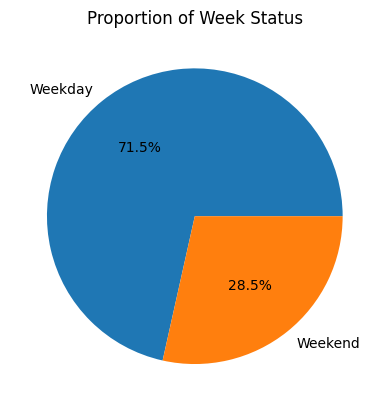

In [ ]:
plt.pie(frequency_table['Count'], labels=frequency_table['WeekStatus'],
        autopct='%1.1f%%')
plt.title('Proportion of Week Status')
plt.show()

_"Berdasarkan hasil tersebut, diketahui bahwa aktivitas industri rata-rata terjadi pada hari kerja dengan persentase 71,5%"_

In [ ]:
category_counts = main_data['Load_Type'].value_counts()
print(category_counts)

Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: Load_Type, dtype: int64


In [ ]:
frequency_table = main_data['Load_Type'].value_counts().reset_index()
frequency_table.columns = ['Load_Type', 'Count']

print(frequency_table)

      Load_Type  Count
0    Light_Load  18072
1   Medium_Load   9696
2  Maximum_Load   7272


In [ ]:
category_mode = main_data['Load_Type'].mode()
print(category_mode)

0    Light_Load
Name: Load_Type, dtype: object


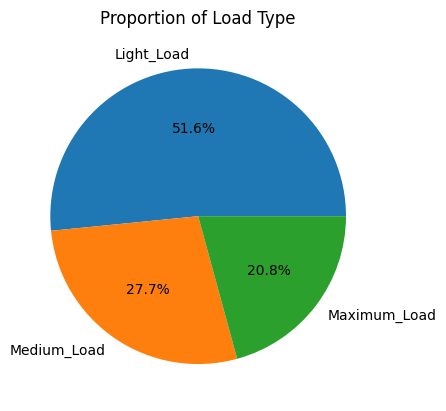

In [ ]:
plt.pie(frequency_table['Count'], labels=frequency_table['Load_Type'],
        autopct='%1.1f%%')
plt.title('Proportion of Load Type')
plt.show()

_"Berdasarkan hasil tersebut, diketahui bahwa industri rata-rata melakukan aktivitas kerja dengan katagori ringan dengan persentase 51,6%, sedangkan beban maksimum industri hanya mencapai 20,8%"_

### **2. Pemodelan**

### **2.1 Polynomial Fit**

In [ ]:
modelling_data = pd.read_csv("Steel_industry_data.csv")

modelling_data['date'] = pd.to_datetime(modelling_data['date'], format='%d/%m/%Y %H:%M')

modelling_data = modelling_data.sort_values(by='date')

median_per_day = modelling_data.groupby(modelling_data['date'].dt.date)['Usage_kWh'].median().reset_index()

median_per_day.columns = ['Hari ke-', 'Median']

median_per_day['Hari ke-'] = range(1, len(median_per_day) + 1)

table = tabulate(
    {key: round(value, 4) for key, value in median_per_day.items()},
    headers='keys',
    tablefmt='pretty',
    showindex=False,
)

print(table)

+----------+--------+
| Hari ke- | Median |
+----------+--------+
|    1     |  3.6   |
|    2     | 10.065 |
|    3     | 10.55  |
|    4     | 25.185 |
|    5     | 14.415 |
|    6     |  4.03  |
|    7     |  3.6   |
|    8     | 23.525 |
|    9     | 34.69  |
|    10    |  5.18  |
|    11    | 30.885 |
|    12    | 31.32  |
|    13    |  5.04  |
|    14    |  4.93  |
|    15    | 35.695 |
|    16    | 26.045 |
|    17    | 38.74  |
|    18    | 72.825 |
|    19    | 75.62  |
|    20    | 50.35  |
|    21    |  5.08  |
|    22    | 39.725 |
|    23    | 42.26  |
|    24    | 40.015 |
|    25    | 42.135 |
|    26    |  79.4  |
|    27    |  6.66  |
|    28    |  6.32  |
|    29    | 58.12  |
|    30    | 63.41  |
|    31    | 67.015 |
|    32    | 73.35  |
|    33    | 42.175 |
|    34    | 38.05  |
|    35    | 4.805  |
|    36    | 62.12  |
|    37    | 42.175 |
|    38    | 39.78  |
|    39    | 56.34  |
|    40    | 58.875 |
|    41    | 5.145  |
|    42    |  4.28  |
|    43   

_"Pada tabel di atas, digunakan median karena feature "Usage_kWh" mempunyai outlier"_

In [ ]:
def swapRows(v,i,j):
    if len(v.shape) == 1:
        v[i],v[j] = v[j],v[i]
    else:
        v[[i,j],:] = v[[j,i],:]

def swapCols(v,i,j):
    v[:,[i,j]] = v[:,[j,i]]

def gaussPivot(a, b, tol=1.0e-12):
    n = len(b)

    s = np.zeros(n)
    for i in range(n):
        s[i] = max(np.abs(a[i,:]))

    for k in range(0, n-1):

        p = np.argmax(np.abs(a[k:n, k]) / s[k:n]) + k
        if abs(a[p, k]) < tol:
            raise Exception('Matriks adalah singular')
        if p != k:
            b[k], b[p] = b[p], b[k]
            s[k], s[p] = s[p], s[k]
            a[k, :], a[p, :] = a[p, :].copy(), a[k, :].copy()

        for i in range(k+1, n):
            if a[i, k] != 0.0:
                lam = a[i, k] / a[k, k]
                a[i, k+1:n] = a[i, k+1:n] - lam * a[k, k+1:n]
                b[i] = b[i] - lam * b[k]
    if abs(a[n-1, n-1]) < tol:
        raise Exception('Matriks adalah singular')

    b[n-1] = b[n-1] / a[n-1, n-1]
    for k in range(n-2, -1, -1):
        b[k] = (b[k] - np.dot(a[k, k+1:n], b[k+1:n])) / a[k, k]
    return b

def polyFit(xData,yData,m):
    a = np.zeros((m+1,m+1))
    b = np.zeros(m+1)
    s = np.zeros(2*m+1)
    for i in range(len(xData)):
        temp = yData[i]
        for j in range(m+1):
            b[j] = b[j] + temp
            temp = temp*xData[i]
        temp = 1.0
        for j in range(2*m+1):
            s[j] = s[j] + temp
            temp = temp*xData[i]
    for i in range(m+1):
        for j in range(m+1):
            a[i,j] = s[i+j]
    return gaussPivot(a,b)

In [ ]:
poly_1 = polyFit(median_per_day['Hari ke-'], median_per_day['Median'], 0)

sym_x = sp.symbols('x')
def f_poly_func(f_poly):
    func = 0
    for i, j in enumerate(f_poly):
        func += j*sym_x**i
    return func

f1 = f_poly_func(poly_1)
print(f'Fungsi polinomialnya yaitu f(x) = {f1}')

Fungsi polinomialnya yaitu f(x) = 15.6350821917808


In [ ]:
polyfit1_median = [f1.subs([(sym_x,i)]) for i in median_per_day['Hari ke-']]
percentage_error = (abs(polyfit1_median - median_per_day['Median']) / median_per_day['Median']) * 100

data_polyfit1 = pd.DataFrame({
    'Hari Ke-': median_per_day['Hari ke-'],
    'Median (Kurva Asli)': median_per_day['Median'],
    'Median (Polinomial 1 Suku)': polyfit1_median,
    'Error (%)': percentage_error
})

table = tabulate(data_polyfit1, headers='keys', tablefmt='pretty', showindex=False)
print(table)

+----------+---------------------+----------------------------+--------------------+
| Hari Ke- | Median (Kurva Asli) | Median (Polinomial 1 Suku) |     Error (%)      |
+----------+---------------------+----------------------------+--------------------+
|    1     |         3.6         |      15.6350821917808      |  334.307838660579  |
|    2     |       10.065        |      15.6350821917808      |  55.3411047370177  |
|    3     |        10.55        |      15.6350821917808      |  48.1998312017140  |
|    4     |       25.185        |      15.6350821917808      |  37.9190701140328  |
|    5     | 14.415000000000001  |      15.6350821917808      |  8.46397635644003  |
|    6     |        4.03         |      15.6350821917808      |  287.967300044189  |
|    7     |         3.6         |      15.6350821917808      |  334.307838660579  |
|    8     |       23.525        |      15.6350821917808      |  33.5384391422706  |
|    9     |        34.69        |      15.6350821917808      |  

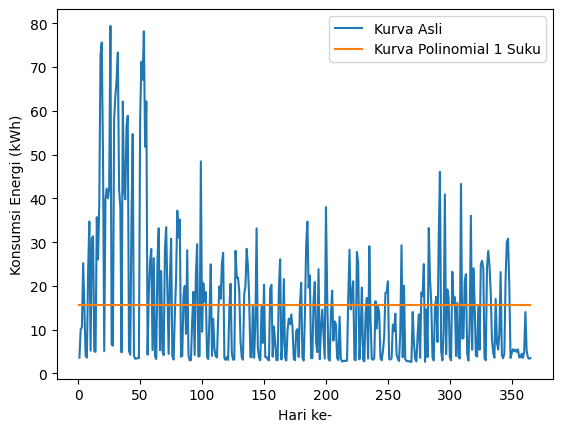

In [ ]:
plt.plot(median_per_day['Hari ke-'],median_per_day['Median'],label='Kurva Asli')
plt.plot(median_per_day['Hari ke-'],polyfit1_median,label='Kurva Polinomial 1 Suku')
plt.ylabel('Konsumsi Energi (kWh)')
plt.xlabel('Hari ke-')
plt.legend()

In [ ]:
poly_5 = polyFit(median_per_day['Hari ke-'], median_per_day['Median'], 4)

sym_x = sp.symbols('x')
def f_poly_func(f_poly):
    func = 0
    for i, j in enumerate(f_poly):
        func += j*sym_x**i
    return func

f5 = f_poly_func(poly_5)
print(f'Fungsi polinomialnya yaitu f(x) = {f5}')

Fungsi polinomialnya yaitu f(x) = -3.15530997032462e-8*x**4 + 2.16652581648678e-5*x**3 - 0.00426732689096986*x**2 + 0.135462900481021*x + 29.0799222895503


In [ ]:
polyfit5_median = [f5.subs([(sym_x,i)]) for i in median_per_day['Hari ke-']]
percentage_error = (abs(polyfit5_median - median_per_day['Median']) / median_per_day['Median']) * 100

data_polyfit5 = pd.DataFrame({
    'Hari Ke-': median_per_day['Hari ke-'],
    'Median (Kurva Asli)': median_per_day['Median'],
    'Median (Polinomial 1 Suku)': polyfit5_median,
    'Error (%)': percentage_error
})

table = tabulate(data_polyfit5, headers='keys', tablefmt='pretty', showindex=False)
print(table)

+----------+---------------------+----------------------------+-------------------+
| Hari Ke- | Median (Kurva Asli) | Median (Polinomial 1 Suku) |     Error (%)     |
+----------+---------------------+----------------------------+-------------------+
|    1     |         3.6         |      29.2111394968454      | 711.420541579040  |
|    2     |       10.065        |      29.3339516001642      | 191.445122704066  |
|    3     |        10.55        |      29.4484874551440      | 179.132582513213  |
|    4     |       25.185        |      29.5548751601479      | 17.3511024822232  |
|    5     | 14.415000000000001  |      29.6532420562645      | 105.711009755563  |
|    6     |        4.03         |      29.7437147273079      | 638.057437402182  |
|    7     |         3.6         |      29.8264189998181      | 728.511638883836  |
|    8     |       23.525        |      29.9014799430604      | 27.1051219683759  |
|    9     |        34.69        |      29.9690218690260      | 13.609046212

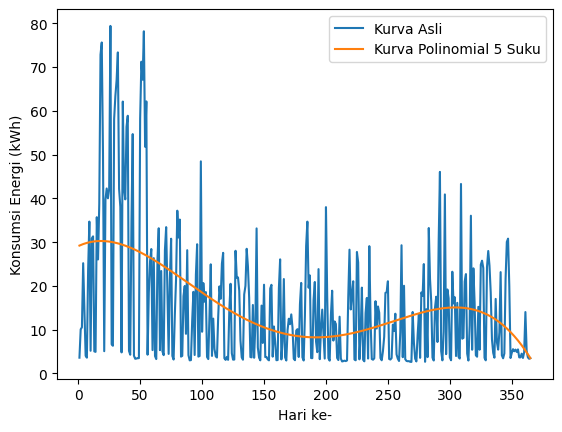

In [ ]:
plt.plot(median_per_day['Hari ke-'], median_per_day['Median'], label='Kurva Asli')
plt.plot(median_per_day['Hari ke-'], polyfit5_median, label='Kurva Polinomial 5 Suku')
plt.ylabel('Konsumsi Energi (kWh)')
plt.xlabel('Hari ke-')
plt.legend()

plt.show()

In [ ]:
poly_10 = polyFit(median_per_day['Hari ke-'], median_per_day['Median'], 9)

sym_x = sp.symbols('x')
def f_poly_func(f_poly):
    func = 0
    for i, j in enumerate(f_poly):
        func += j*sym_x**i
    return func

f10 = f_poly_func(poly_10)
print(f'Fungsi polinomialnya yaitu f(x) = {f10}')

Fungsi polinomialnya yaitu f(x) = 9.27353909999928e-19*x**9 - 1.6524995517034e-15*x**8 + 1.26736168097232e-12*x**7 - 5.48908195310219e-10*x**6 + 1.47575670945456e-7*x**5 - 2.53301171598349e-5*x**4 + 0.00272048964070628*x**3 - 0.168337824910126*x**2 + 4.77513170690544*x - 6.67380456899861


In [ ]:
polyfit10_median = [f10.subs([(sym_x,i)]) for i in median_per_day['Hari ke-']]
percentage_error = (abs(polyfit10_median - median_per_day['Median']) / median_per_day['Median']) * 100

data_polyfit10 = pd.DataFrame({
    'Hari Ke-': median_per_day['Hari ke-'],
    'Median (Kurva Asli)': median_per_day['Median'],
    'Median (Polinomial 10 Suku)': polyfit10_median,
    'Error (%)': percentage_error
})

table = tabulate(data_polyfit10, headers='keys', tablefmt='pretty', showindex=False)
print(table)

+----------+---------------------+-----------------------------+-------------------+
| Hari Ke- | Median (Kurva Asli) | Median (Polinomial 10 Suku) |     Error (%)     |
+----------+---------------------+-----------------------------+-------------------+
|    1     |         3.6         |      -2.06431538045172      | 157.342093901437  |
|    2     |       10.065        |      2.22447086787600       | 77.8989481582116  |
|    3     |        10.55        |      6.20798707183056       | 41.1565206461558  |
|    4     |       25.185        |      9.90109277688890       | 60.6865484340326  |
|    5     | 14.415000000000001  |      13.3180909202889       | 7.60949760465546  |
|    6     |        4.03         |      16.4727441967934       | 308.752957736808  |
|    7     |         3.6         |      19.3782910542440       | 438.285862617890  |
|    8     |       23.525        |      22.0474613249976       | 6.28071700319836  |
|    9     |        34.69        |      24.4924914992690       | 

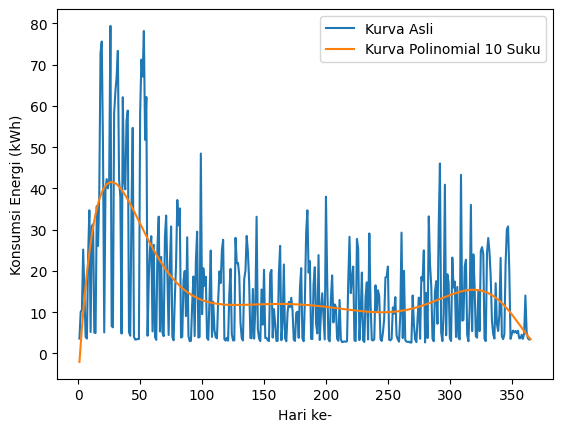

In [ ]:
plt.plot(median_per_day['Hari ke-'], median_per_day['Median'], label='Kurva Asli')
plt.plot(median_per_day['Hari ke-'], polyfit10_median, label='Kurva Polinomial 10 Suku')
plt.ylabel('Konsumsi Energi (kWh)')
plt.xlabel('Hari ke-')
plt.legend()

plt.show()

In [ ]:
poly_15 = polyFit(median_per_day['Hari ke-'], median_per_day['Median'], 14)

sym_x = sp.symbols('x')
def f_poly_func(f_poly):
    func = 0
    for i, j in enumerate(f_poly):
        func += j*sym_x**i
    return func

f15 = f_poly_func(poly_15)
print(f'Fungsi polinomialnya yaitu f(x) = {f15}')

Fungsi polinomialnya yaitu f(x) = 2.31096071542295e-30*x**14 - 3.05182399085332e-27*x**13 + 1.15497667358051e-24*x**12 - 2.39321711615276e-22*x**11 + 5.89389685581282e-19*x**10 - 6.65197621494405e-16*x**9 + 3.56667231690014e-13*x**8 - 1.11502544560223e-10*x**7 + 2.18509505896381e-8*x**6 - 2.71473910678392e-6*x**5 + 0.00020607606815464*x**4 - 0.00851615923854433*x**3 + 0.127109820385489*x**2 + 1.35801901694753*x + 3.69210043084214


In [ ]:
polyfit15_median = [f15.subs([(sym_x,i)]) for i in median_per_day['Hari ke-']]
percentage_error = (abs(polyfit15_median - median_per_day['Median']) / median_per_day['Median']) * 100

data_polyfit15 = pd.DataFrame({
    'Hari Ke-': median_per_day['Hari ke-'],
    'Median (Kurva Asli)': median_per_day['Median'],
    'Median (Polinomial 15 Suku)': polyfit15_median,
    'Error (%)': percentage_error
})

table = tabulate(data_polyfit15, headers='keys', tablefmt='pretty', showindex=False)
print(table)

+----------+---------------------+-----------------------------+---------------------+
| Hari Ke- | Median (Kurva Asli) | Median (Polinomial 15 Suku) |      Error (%)      |
+----------+---------------------+-----------------------------+---------------------+
|    1     |         3.6         |      5.16891649200547       |  43.5810136668186   |
|    2     |       10.065        |      6.85166020208934       |  31.9258797606623   |
|    3     |        10.55        |      8.69625773344497       |  17.5710167445975   |
|    4     |       25.185        |      10.6629627119722       |  57.6614543896279   |
|    5     | 14.415000000000001  |      12.7160679512833       |  11.7858622873169   |
|    6     |        4.03         |      14.8236313006837       |  267.832042200588   |
|    7     |         3.6         |      16.9572150937991       |  371.033752605530   |
|    8     |       23.525        |      19.0916386981091       |  18.8453190303546   |
|    9     |        34.69        |      21.

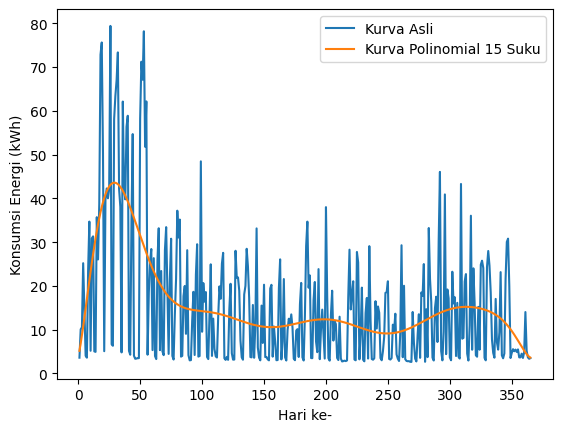

In [ ]:
plt.plot(median_per_day['Hari ke-'], median_per_day['Median'], label='Kurva Asli')
plt.plot(median_per_day['Hari ke-'], polyfit15_median, label='Kurva Polinomial 15 Suku')
plt.ylabel('Konsumsi Energi (kWh)')
plt.xlabel('Hari ke-')
plt.legend()

plt.show()

In [ ]:
poly_30 = polyFit(median_per_day['Hari ke-'], median_per_day['Median'], 29)

sym_x = sp.symbols('x')
def f_poly_func(f_poly):
    func = 0
    for i, j in enumerate(f_poly):
        func += j*sym_x**i
    return func

f30 = f_poly_func(poly_30)
print(f'Fungsi polinomialnya yaitu f(x) = {f30}')

Fungsi polinomialnya yaitu f(x) = 9.34748407655229e-68*x**29 - 2.42982564747433e-64*x**28 + 1.89447212767992e-61*x**27 - 5.48383571373365e-59*x**26 + 4.9371886915123e-58*x**25 + 5.48621043564229e-54*x**24 - 1.94600399947444e-51*x**23 - 2.74947695817007e-49*x**22 - 3.90301078435828e-47*x**21 + 1.75564504850472e-43*x**20 + 7.16109117202899e-42*x**19 - 1.7581522156267e-38*x**18 - 5.95740655350212e-36*x**17 + 2.53022331834334e-33*x**16 + 1.11971277825458e-31*x**15 - 5.13078022345533e-29*x**14 + 4.63559020907674e-26*x**13 - 2.49561278521449e-23*x**12 - 1.10086962899038e-23*x**11 - 1.99229085370393e-20*x**10 + 1.20912770603125e-15*x**9 - 4.42485753967145e-13*x**8 + 4.35237557690213e-11*x**7 + 6.60110107694732e-9*x**6 - 2.13747154119026e-6*x**5 + 0.000229094111280161*x**4 - 0.0115797032321787*x**3 + 0.233677538250276*x**2 + 0.00523121899893051*x + 7.85273550673381


In [ ]:
polyfit30_median = [f30.subs([(sym_x,i)]) for i in median_per_day['Hari ke-']]
percentage_error = (abs(polyfit30_median - median_per_day['Median']) / median_per_day['Median']) * 100

data_polyfit30 = pd.DataFrame({
    'Hari Ke-': median_per_day['Hari ke-'],
    'Median (Kurva Asli)': median_per_day['Median'],
    'Median (Polinomial 30 Suku)': polyfit30_median,
    'Error (%)': percentage_error
})

table = tabulate(data_polyfit30, headers='keys', tablefmt='pretty', showindex=False)
print(table)

+----------+---------------------+-----------------------------+--------------------+
| Hari Ke- | Median (Kurva Asli) | Median (Polinomial 30 Suku) |     Error (%)      |
+----------+---------------------+-----------------------------+--------------------+
|    1     |         3.6         |      8.08029152403476       |  124.452542334299  |
|    2     |       10.065        |      8.70886800649536       |  13.4737406210098  |
|    3     |        10.55        |      9.67691714265323       |  8.27566689428216  |
|    4     |       25.185        |      10.9278870320255       |  56.6095412665258  |
|    5     | 14.415000000000001  |      12.4099777469600       |  13.9092768160941  |
|    6     |        4.03         |      14.0759027229173       |  249.277983198939  |
|    7     |         3.6         |      15.8826556369128       |  341.184878803133  |
|    8     |       23.525        |      17.7912829177655       |  24.3728675121551  |
|    9     |        34.69        |      19.76666201614

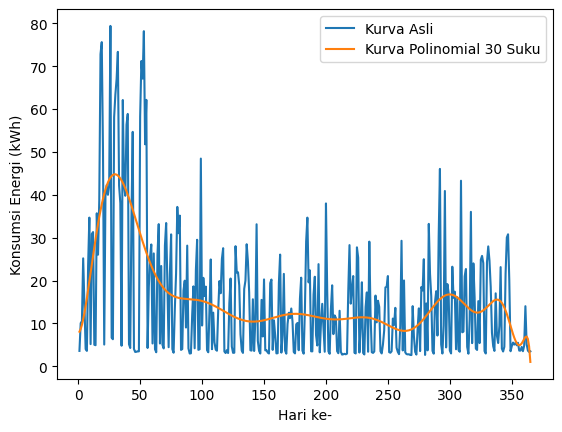

In [ ]:
plt.plot(median_per_day['Hari ke-'], median_per_day['Median'], label='Kurva Asli')
plt.plot(median_per_day['Hari ke-'], polyfit30_median, label='Kurva Polinomial 30 Suku')
plt.ylabel('Konsumsi Energi (kWh)')
plt.xlabel('Hari ke-')
plt.legend()

plt.show()

In [ ]:
poly_35 = polyFit(median_per_day['Hari ke-'], median_per_day['Median'], 34)

sym_x = sp.symbols('x')
def f_poly_func(f_poly):
    func = 0
    for i, j in enumerate(f_poly):
        func += j*sym_x**i
    return func

f35 = f_poly_func(poly_35)
print(f'Fungsi polinomialnya yaitu f(x) = {f35}')

Fungsi polinomialnya yaitu f(x) = -1.0040750808566e-80*x**34 + 1.40497207571166e-77*x**33 - 9.89880287419801e-76*x**32 - 4.84294759743191e-72*x**31 + 1.13960572243231e-69*x**30 + 2.29352327448793e-67*x**29 + 1.5101301858162e-64*x**28 - 5.00007148461709e-62*x**27 - 3.60547379199381e-59*x**26 + 1.02793459425025e-56*x**25 - 1.76950036463407e-54*x**24 + 1.05624127816308e-51*x**23 + 2.53030043963041e-50*x**22 - 9.29242976177235e-47*x**21 - 9.76956372941877e-45*x**20 + 1.69255305571391e-41*x**19 - 3.76952215364378e-39*x**18 + 1.17975068843169e-36*x**17 - 1.25322275006544e-33*x**16 + 1.09467696650267e-31*x**15 + 1.8151171479345e-28*x**14 - 1.7257445580605e-26*x**13 - 1.67343260778551e-23*x**12 + 1.67183373090494e-21*x**11 + 8.32793716829277e-19*x**10 - 9.38902464957976e-17*x**9 + 2.83981001801801e-14*x**8 - 3.49775314590677e-11*x**7 + 1.20785839961581e-8*x**6 - 1.98652835643111e-6*x**5 + 0.00017509953331462*x**4 - 0.00783980527529986*x**3 + 0.121665246906435*x**2 + 1.34710970525518*x + 3.8254

In [ ]:
polyfit35_median = [f35.subs([(sym_x,i)]) for i in median_per_day['Hari ke-']]
percentage_error = (abs(polyfit35_median - median_per_day['Median']) / median_per_day['Median']) * 100

data_polyfit35 = pd.DataFrame({
    'Hari Ke-': median_per_day['Hari ke-'],
    'Median (Kurva Asli)': median_per_day['Median'],
    'Median (Polinomial 35 Suku)': polyfit35_median,
    'Error (%)': percentage_error
})

table = tabulate(data_polyfit35, headers='keys', tablefmt='pretty', showindex=False)
print(table)

+----------+---------------------+-----------------------------+-------------------+
| Hari Ke- | Median (Kurva Asli) | Median (Polinomial 35 Suku) |     Error (%)     |
+----------+---------------------+-----------------------------+-------------------+
|    1     |         3.6         |      5.28652639343611       | 46.8479553732252  |
|    2     |       10.065        |      6.94631886962000       | 30.9854061637357  |
|    3     |        10.55        |      8.76376878177581       | 16.9311015945420  |
|    4     |       25.185        |      10.7015935335428       | 57.5080661761256  |
|    5     | 14.415000000000001  |      12.7260374744064       | 11.7167015303059  |
|    6     |        4.03         |      14.8066628466226       | 267.410988749941  |
|    7     |         3.6         |      16.9161487326630       | 369.893020351751  |
|    8     |       23.525        |      19.0300978317438       | 19.1069167619816  |
|    9     |        34.69        |      21.1268508950141       | 

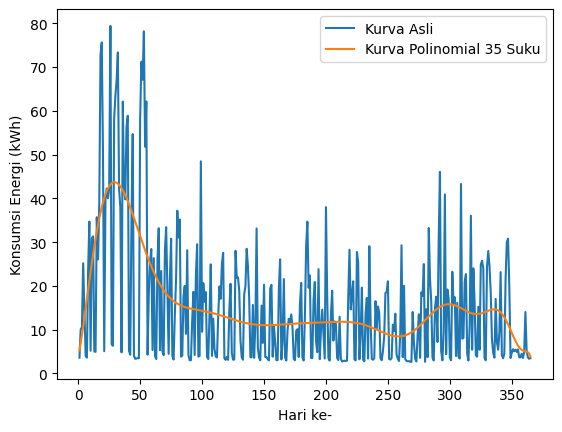

In [ ]:
plt.plot(median_per_day['Hari ke-'], median_per_day['Median'], label='Kurva Asli')
plt.plot(median_per_day['Hari ke-'], polyfit35_median, label='Kurva Polinomial 35 Suku')
plt.ylabel('Konsumsi Energi (kWh)')
plt.xlabel('Hari ke-')
plt.legend()

plt.show()

In [ ]:
poly_50 = polyFit(median_per_day['Hari ke-'], median_per_day['Median'], 49)

sym_x = sp.symbols('x')
def f_poly_func(f_poly):
    func = 0
    for i, j in enumerate(f_poly):
        func += j*sym_x**i
    return func

f50 = f_poly_func(poly_50)
print(f'Fungsi polinomialnya yaitu f(x) = {f50}')

Fungsi polinomialnya yaitu f(x) = 1.83787006192702e-118*x**49 - 2.79863069997881e-115*x**48 + 9.16784941378245e-113*x**47 + 3.59108617095063e-110*x**46 - 1.78584796648198e-107*x**45 + 2.14629694859612e-105*x**44 - 9.50786246717927e-103*x**43 - 2.70586900097393e-100*x**42 - 2.78491656371047e-97*x**41 + 1.05476716147865e-94*x**40 + 6.42090782855827e-92*x**39 + 2.30341758579728e-89*x**38 - 6.10808809505921e-87*x**37 - 2.84567891731978e-84*x**36 - 1.18550211690517e-81*x**35 - 2.00535577447452e-79*x**34 + 1.22925632358451e-76*x**33 + 3.86671527482028e-74*x**32 + 1.43461702847791e-71*x**31 - 7.17568996354421e-69*x**30 + 2.17110730319108e-66*x**29 + 1.13891828276192e-63*x**28 - 5.10860166022085e-61*x**27 - 1.03357288673644e-58*x**26 - 2.67815315184434e-56*x**25 + 7.956160261484e-55*x**24 + 5.29858919624098e-51*x**23 + 1.99658771403686e-48*x**22 - 4.06953793250741e-46*x**21 + 1.12860639181046e-43*x**20 - 2.57882252583558e-41*x**19 - 2.44577188859019e-38*x**18 + 4.16170813339347e-36*x**17 - 4.4

In [ ]:
polyfit50_median = [f50.subs([(sym_x,i)]) for i in median_per_day['Hari ke-']]
percentage_error = (abs(polyfit50_median - median_per_day['Median']) / median_per_day['Median']) * 100

data_polyfit50 = pd.DataFrame({
    'Hari Ke-': median_per_day['Hari ke-'],
    'Median (Kurva Asli)': median_per_day['Median'],
    'Median (Polinomial 50 Suku)': polyfit50_median,
    'Error (%)': percentage_error
})

table = tabulate(data_polyfit50, headers='keys', tablefmt='pretty', showindex=False)
print(table)

+----------+---------------------+-----------------------------+--------------------+
| Hari Ke- | Median (Kurva Asli) | Median (Polinomial 50 Suku) |     Error (%)      |
+----------+---------------------+-----------------------------+--------------------+
|    1     |         3.6         |      10.3843547676619       |  188.454299101719  |
|    2     |       10.065        |      9.77757021219841       |  2.85573559663776  |
|    3     |        10.55        |      9.81648369605819       |  6.95276117480392  |
|    4     |       25.185        |      10.3979486841052       |  58.7137237081388  |
|    5     | 14.415000000000001  |      11.4283587634485       |  20.7189818699377  |
|    6     |        4.03         |      12.8230687096423       |  218.190290561844  |
|    7     |         3.6         |      14.5058372491245       |  302.939923586791  |
|    8     |       23.525        |      16.4082912047645       |  30.2516845706078  |
|    9     |        34.69        |      18.46941070044

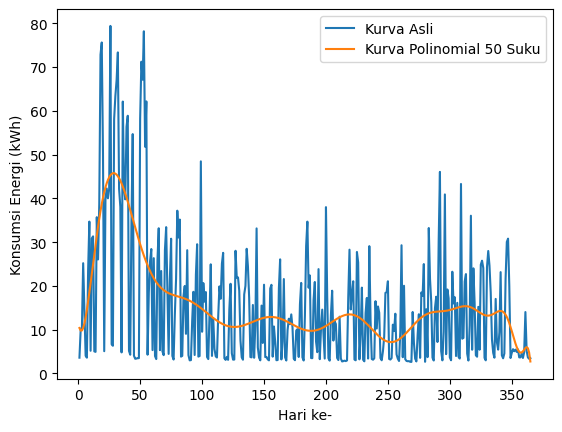

In [ ]:
plt.plot(median_per_day['Hari ke-'], median_per_day['Median'], label='Kurva Asli')
plt.plot(median_per_day['Hari ke-'], polyfit50_median, label='Kurva Polinomial 50 Suku')
plt.ylabel('Konsumsi Energi (kWh)')
plt.xlabel('Hari ke-')
plt.legend()

plt.show()

In [ ]:
arpolyfit1_median = np.array(polyfit1_median)
arpolyfit5_median = np.array(polyfit5_median)
arpolyfit10_median = np.array(polyfit10_median)
arpolyfit15_median = np.array(polyfit15_median)
arpolyfit30_median = np.array(polyfit30_median)
arpolyfit35_median = np.array(polyfit35_median)
arpolyfit50_median = np.array(polyfit50_median)


rmse_1 = np.sqrt(mean_squared_error(median_per_day['Median'], arpolyfit1_median))
rmse_5 = np.sqrt(mean_squared_error(median_per_day['Median'], arpolyfit5_median))
rmse_10 = np.sqrt(mean_squared_error(median_per_day['Median'], arpolyfit10_median))
rmse_15 = np.sqrt(mean_squared_error(median_per_day['Median'], arpolyfit15_median))
rmse_30 = np.sqrt(mean_squared_error(median_per_day['Median'], arpolyfit30_median))
rmse_35 = np.sqrt(mean_squared_error(median_per_day['Median'], arpolyfit35_median))
rmse_35 = np.sqrt(mean_squared_error(median_per_day['Median'], arpolyfit35_median))
rmse_50 = np.sqrt(mean_squared_error(median_per_day['Median'], arpolyfit50_median))

print("Nilai RMSE Polinomial dengan 1 Suku adalah:", rmse_1)
print("Nilai RMSE Polinomial dengan 5 Suku adalah:", rmse_5)
print("Nilai RMSE Polinomial dengan 10 Suku adalah:", rmse_10)
print("Nilai RMSE Polinomial dengan 15 Suku adalah:", rmse_15)
print("Nilai RMSE Polinomial dengan 30 Suku adalah:", rmse_30)
print("Nilai RMSE Polinomial dengan 35 Suku adalah:", rmse_35)
print("Nilai RMSE Polinomial dengan 50 Suku adalah:", rmse_50)

Nilai RMSE Polinomial dengan 1 Suku adalah: 15.536271964940205
Nilai RMSE Polinomial dengan 5 Suku adalah: 13.711679725997925
Nilai RMSE Polinomial dengan 10 Suku adalah: 12.834161297865469
Nilai RMSE Polinomial dengan 15 Suku adalah: 12.76582975474145
Nilai RMSE Polinomial dengan 30 Suku adalah: 12.77261366520528
Nilai RMSE Polinomial dengan 35 Suku adalah: 12.752425247584451
Nilai RMSE Polinomial dengan 50 Suku adalah: 12.81457143774946


_"Berdasarkan hasil tersebut, diketahui bahwa pemodelan polinomial terbaik adalah polinomial dengan 35 suku karena nilai RMSE (Root Mean Square Error)-nya yaitu 12.752425247584451 yang relatif lebih kecil jika dibandingkan dengan polinomial lain"_

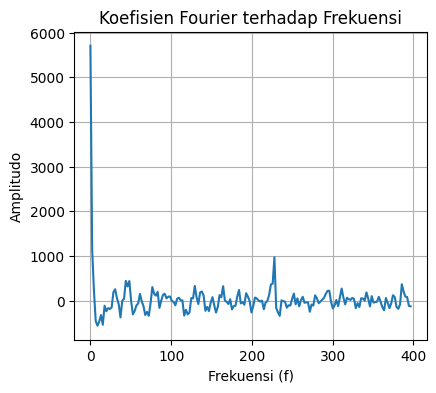

In [ ]:
y = median_per_day['Median'].values
x = median_per_day['Hari ke-']

N = len(y)

T = 1.0 / 800

yf = fft(y)
xf = fftfreq(N, T)[:N//2]

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(xf, yf[0:N//2].real)
plt.title('Koefisien Fourier terhadap Frekuensi')
plt.xlabel('Frekuensi (f)')
plt.ylabel('Amplitudo')
plt.grid()

plt.show()

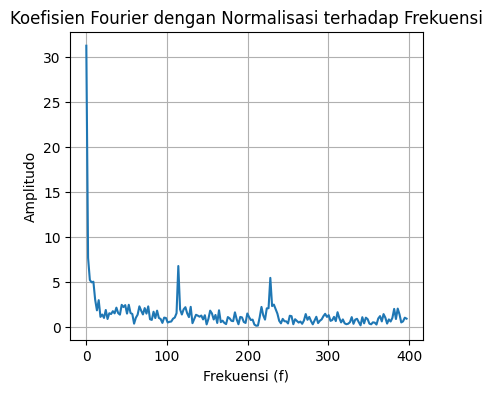

In [ ]:
N = len(y)

T = 1.0 / 800

yf = fft(y)
xf = fftfreq(N, T)[:N//2]

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.title('Koefisien Fourier dengan Normalisasi terhadap Frekuensi')
plt.xlabel('Frekuensi (f)')
plt.ylabel('Amplitudo')
plt.grid()

plt.show()

In [ ]:
data_koefisien = pd.DataFrame({
    'Frekuensi (f)': xf[:182],
    'Koefisien Fourier (Bagian Real)': yf.real[:182],
    'Koefisien Fourier (Bagian Imaginer)': yf.imag[:182],
    'Magnitudo': np.abs(yf)[:182]
})

table = tabulate(data_koefisien, headers='keys', tablefmt='pretty', showindex=False)

print(table)

+--------------------+---------------------------------+-------------------------------------+--------------------+
|   Frekuensi (f)    | Koefisien Fourier (Bagian Real) | Koefisien Fourier (Bagian Imaginer) |     Magnitudo      |
+--------------------+---------------------------------+-------------------------------------+--------------------+
|        0.0         |            5706.805             |                -0.0                 |      5706.805      |
| 2.191780821917808  |       1122.0941082074905        |         -834.4024734906353          | 1398.3285291523068 |
| 4.383561643835616  |        218.5818905521072        |         -925.1637545432018          | 950.6345331397378  |
| 6.575342465753424  |       -459.43801256814015       |         -778.5887340599406          | 904.0374462363953  |
| 8.767123287671232  |       -563.0364344720396        |         -723.1038684016157          | 916.4547075771767  |
| 10.95890410958904  |       -466.63952821795203       |         -292.68

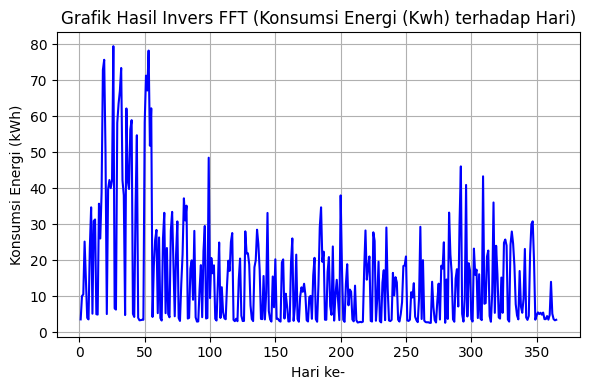

In [ ]:
y_inv = ifft(yf)

plt.figure(figsize=(6, 4))
plt.plot(x, y_inv.real, 'b-')
plt.title('Grafik Hasil Invers FFT (Konsumsi Energi (Kwh) terhadap Hari)')
plt.xlabel('Hari ke-')
plt.ylabel('Konsumsi Energi (kWh)')
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
error_percentage = (abs(median_per_day['Median'] - y_inv.real) / median_per_day['Median']) * 100

data_IFFT = pd.DataFrame({
    'Hari ke-': median_per_day['Hari ke-'],
    'Konsumsi Energi (Kurva Asli)': median_per_day['Median'],
    'Konsumsi Energi (Nilai IFFT)': y_inv.real,
    'Error (%)': error_percentage
})

table = tabulate(data_IFFT, headers='keys', tablefmt='pretty', showindex=False)

print(table)

+----------+------------------------------+------------------------------+------------------------+
| Hari ke- | Konsumsi Energi (Kurva Asli) | Konsumsi Energi (Nilai IFFT) |       Error (%)        |
+----------+------------------------------+------------------------------+------------------------+
|   1.0    |             3.6              |      3.600000000000014       | 3.824101529264428e-13  |
|   2.0    |            10.065            |      10.065000000000014      | 1.4119080690712375e-13 |
|   3.0    |            10.55             |      10.550000000000013      | 1.1786253910712561e-13 |
|   4.0    |            25.185            |      25.185000000000024      | 9.874526802304351e-14  |
|   5.0    |      14.415000000000001      |      14.415000000000008      | 4.9291899809927173e-14 |
|   6.0    |             4.03             |      4.029999999999986       | 3.5262666787101743e-13 |
|   7.0    |             3.6              |      3.5999999999999943      | 1.6036554800141151e-13 |


In [ ]:
rmse_ifft = np.sqrt(mean_squared_error(median_per_day['Median'], y_inv.real))

print("Nilai RMSE dengan FFT dan IFFT adalah:", rmse_ifft)

Nilai RMSE dengan FFT dan IFFT adalah: 7.362551965828097e-15


_"Berdasarkan hasil tersebut, diketahui bahwa pemodelan dengan FFT dan IFFT lebih baik jika dibandingkan dengan polinomial. Hal ini ditunjukkan dengan nilai RMSE pada FFT dan IFFT adalah $7.362551965828097x10^{-15}$, sedangkan nilai RMSE pada polinomial dengan suku 35 yaitu 12.752425247584451."_

### **3. Ekstraksi Fitur**

In [ ]:
extraction_data = pd.read_csv("Steel_industry_data.csv")

extraction_data['date'] = pd.to_datetime(extraction_data['date'], format='%d/%m/%Y %H:%M')

extraction_data = extraction_data.sort_values(by='date')

extraction_data['gradient'] = extraction_data['Usage_kWh'].diff() / extraction_data['date'].diff().dt.total_seconds() * 60 * 15

gradmax_per_day_week = extraction_data.groupby([extraction_data['date'].dt.date, 'WeekStatus'])['gradient'].max().reset_index()

del gradmax_per_day_week['date']

gradmax_per_day_week['Hari ke-'] = range(1, len(gradmax_per_day_week) + 1)

gradmax_per_day_week = gradmax_per_day_week.rename(columns={'WeekStatus': 'Status Mingguan', 'gradient': 'Gradmax'})
new_column_order = ['Hari ke-', 'Status Mingguan', 'Gradmax']
gradmax_per_day_week = gradmax_per_day_week[new_column_order]

data_dict = gradmax_per_day_week.to_dict(orient='records')
formatted_data = [{key: round(value, 4) if isinstance(value, (float, int)) else value for key, value in row.items()} for row in data_dict]

table = tabulate(formatted_data, headers='keys', tablefmt='pretty', showindex=False)

print(table)


+----------+-----------------+---------+
| Hari ke- | Status Mingguan | Gradmax |
+----------+-----------------+---------+
|    1     |     Weekday     |  0.83   |
|    2     |     Weekday     |  71.64  |
|    3     |     Weekday     |  43.56  |
|    4     |     Weekday     |  75.42  |
|    5     |     Weekday     |  75.89  |
|    6     |     Weekend     |  0.76   |
|    7     |     Weekend     |  0.86   |
|    8     |     Weekday     |  80.61  |
|    9     |     Weekday     |  70.3   |
|    10    |     Weekday     |  87.52  |
|    11    |     Weekday     |  68.51  |
|    12    |     Weekday     |  94.9   |
|    13    |     Weekend     |  45.43  |
|    14    |     Weekend     |  20.66  |
|    15    |     Weekday     |  70.53  |
|    16    |     Weekday     |  68.33  |
|    17    |     Weekday     |  58.93  |
|    18    |     Weekday     |  90.69  |
|    19    |     Weekday     |  102.1  |
|    20    |     Weekend     |  36.18  |
|    21    |     Weekend     |  29.49  |
|    22    |    

In [ ]:
extraction_data = pd.read_csv("Steel_industry_data.csv")

extraction_data['date'] = pd.to_datetime(extraction_data['date'], format='%d/%m/%Y %H:%M')

extraction_data = extraction_data.sort_values(by='date')

extraction_data['gradient'] = extraction_data['Usage_kWh'].diff() / extraction_data['date'].diff().dt.total_seconds() * 60 * 15

gradmax_per_day_week = extraction_data.groupby([extraction_data['date'].dt.date, 'WeekStatus'])['gradient'].max().reset_index()

gradmax_per_day_week = gradmax_per_day_week.groupby('WeekStatus').head(30)

gradmax_per_day_week['No'] = range(1, len(gradmax_per_day_week) + 1)

gradmax_per_day_week = gradmax_per_day_week.rename(columns={'WeekStatus': 'Status Mingguan', 'gradient': 'Gradmax'})

new_column_order = ['No', 'Status Mingguan', 'Gradmax']
gradmax_per_day_week = gradmax_per_day_week[new_column_order]

data_dict = gradmax_per_day_week.to_dict(orient='records')
formatted_data = [{key: round(value, 4) if isinstance(value, (float, int)) else value for key, value in row.items()} for row in data_dict]

table = tabulate(formatted_data, headers='keys', tablefmt='pretty', showindex=False)
print(table)


+----+-----------------+---------+
| No | Status Mingguan | Gradmax |
+----+-----------------+---------+
| 1  |     Weekday     |  0.83   |
| 2  |     Weekday     |  71.64  |
| 3  |     Weekday     |  43.56  |
| 4  |     Weekday     |  75.42  |
| 5  |     Weekday     |  75.89  |
| 6  |     Weekend     |  0.76   |
| 7  |     Weekend     |  0.86   |
| 8  |     Weekday     |  80.61  |
| 9  |     Weekday     |  70.3   |
| 10 |     Weekday     |  87.52  |
| 11 |     Weekday     |  68.51  |
| 12 |     Weekday     |  94.9   |
| 13 |     Weekend     |  45.43  |
| 14 |     Weekend     |  20.66  |
| 15 |     Weekday     |  70.53  |
| 16 |     Weekday     |  68.33  |
| 17 |     Weekday     |  58.93  |
| 18 |     Weekday     |  90.69  |
| 19 |     Weekday     |  102.1  |
| 20 |     Weekend     |  36.18  |
| 21 |     Weekend     |  29.49  |
| 22 |     Weekday     |  69.87  |
| 23 |     Weekday     |  67.28  |
| 24 |     Weekday     |  66.28  |
| 25 |     Weekday     |  45.68  |
| 26 |     Weekday  

In [ ]:
weekday_length = gradmax_per_day_week[gradmax_per_day_week['Status Mingguan'] == 'Weekday'].shape[0]
weekend_length = gradmax_per_day_week[gradmax_per_day_week['Status Mingguan'] == 'Weekend'].shape[0]

print('Jumlah Weekday:', weekday_length)
print('Jumlah Weekend:', weekend_length)


Jumlah Weekday: 30
Jumlah Weekend: 30


_"Jumlah sampling weekday dan weeekend pada feature WeekStatus sudah sama, sehingga analisis dapat dilakukan secara lebih lanjut"_

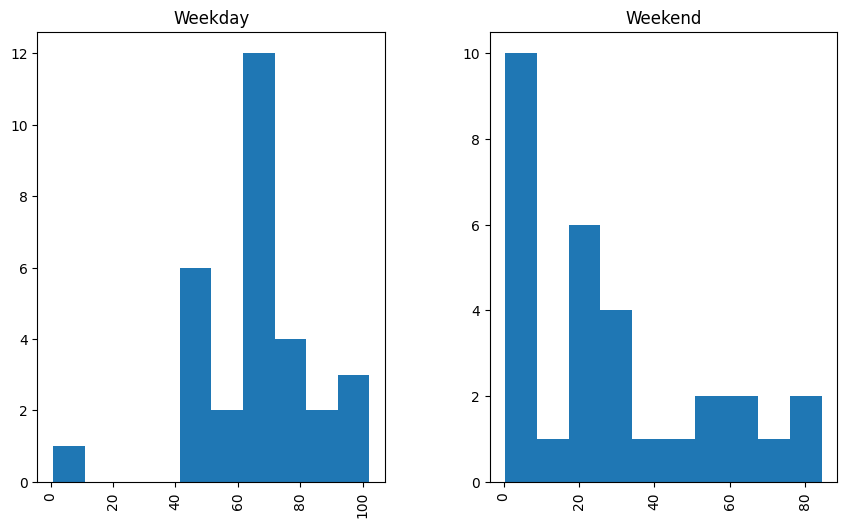

In [ ]:
gradmax_per_day_week[['Gradmax', 'Status Mingguan']].hist(by='Status Mingguan', figsize=(10, 6))
plt.show()

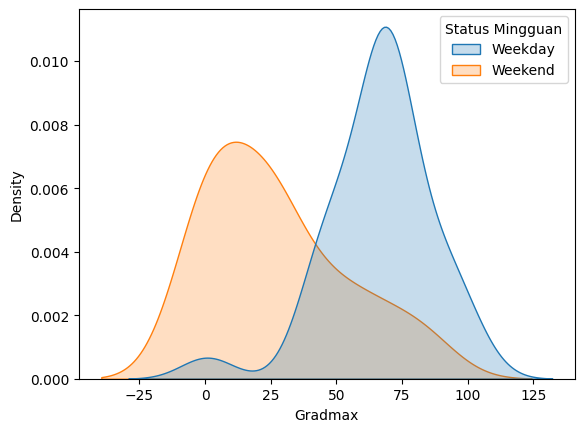

In [ ]:
sns.kdeplot(data=gradmax_per_day_week, x='Gradmax', hue='Status Mingguan', fill=True)
plt.show()


In [ ]:
weekend_data = gradmax_per_day_week[gradmax_per_day_week['Status Mingguan'] == 'Weekend']['Gradmax']
weekday_data = gradmax_per_day_week[gradmax_per_day_week['Status Mingguan'] == 'Weekday']['Gradmax']

ks_statistic, ks_p_value = ks_2samp(weekend_data, weekday_data)

print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {ks_p_value}")

alpha = 0.05
if ks_p_value < alpha:
    print("Menolak hipotesis nol: Distribusi data berbeda secara signifikan.")
else:
    print("Menerima hipotesis nol: Distirbusi data tidak berbeda secara signifikan.")

KS Statistic: 0.7
P-value: 2.5000118318420276e-07
Menolak hipotesis nol: Distribusi data berbeda secara signifikan.


_"Berdasarkan hasil tersebut, diketahui bahwa histogram, density plot, dan KS-test dapat membedakan penggunakan konsumsi energi pada hari kerja dan hari libur dengan parameter gradmax"_

In [ ]:
extraction_data_f = pd.read_csv("Steel_industry_data.csv")

extraction_data_f['date'] = pd.to_datetime(extraction_data_f['date'], format='%d/%m/%Y %H:%M')

extraction_data_f = extraction_data_f.sort_values(by='date')

fft_values = np.fft.fft(extraction_data_f['Usage_kWh'])
frequencies = np.fft.fftfreq(len(extraction_data_f['Usage_kWh']), extraction_data_f['date'].diff().dt.total_seconds() * 60)

weekend_data = extraction_data_f[extraction_data_f['WeekStatus'] == 'Weekend'].copy()
weekday_data = extraction_data_f[extraction_data_f['WeekStatus'] == 'Weekday'].copy()

max_indices = np.argpartition(np.abs(fft_values), -(30*2))[-60:]
max_values = np.abs(fft_values)[max_indices]
max_frequencies = frequencies[max_indices]

max_data = pd.DataFrame({'Frekuensi': max_frequencies, 'Fouriermax': max_values})
max_data['WeekStatus'] = np.concatenate([['Weekend'] * 30, ['Weekday'] * 30])

max_data = max_data.sort_values(by=['WeekStatus', 'Fouriermax'], ascending=[True, False])

max_data['No'] = range(1, len(max_data) + 1)
max_data = max_data.rename(columns={'WeekStatus': 'Status Mingguan'})

new_column_order = ['No', 'Status Mingguan', 'Frekuensi', 'Fouriermax']
max_data = max_data[new_column_order]

data_dict = max_data.to_dict(orient='records')
formatted_data = [{key: round(value, 4) if isinstance(value, (float, int)) else value for key, value in row.items()} for row in data_dict]

table = tabulate(formatted_data, headers='keys', tablefmt='pretty', showindex=False)
print(table)


+----+-----------------+-----------+-------------+
| No | Status Mingguan | Frekuensi | Fouriermax  |
+----+-----------------+-----------+-------------+
| 1  |     Weekday     |    0.0    |  959636.71  |
| 2  |     Weekday     |    0.0    | 450953.6879 |
| 3  |     Weekday     |   -0.0    | 450953.6879 |
| 4  |     Weekday     |   -0.0    | 191347.3678 |
| 5  |     Weekday     |    0.0    | 191347.3678 |
| 6  |     Weekday     |    0.0    | 155467.0963 |
| 7  |     Weekday     |   -0.0    | 155467.0963 |
| 8  |     Weekday     |   -0.0    | 149693.4803 |
| 9  |     Weekday     |    0.0    | 149693.4803 |
| 10 |     Weekday     |    0.0    | 147387.5773 |
| 11 |     Weekday     |   -0.0    | 147387.5773 |
| 12 |     Weekday     |    0.0    | 123922.975  |
| 13 |     Weekday     |   -0.0    | 123922.975  |
| 14 |     Weekday     |   -0.0    | 111576.7388 |
| 15 |     Weekday     |    0.0    | 111576.7388 |
| 16 |     Weekday     |   -0.0    | 101516.5009 |
| 17 |     Weekday     |    0.0

In [ ]:
weekday_length = max_data[max_data['Status Mingguan'] == 'Weekday'].shape[0]
weekend_length = max_data[max_data['Status Mingguan'] == 'Weekend'].shape[0]

print('Jumlah Weekday:', weekday_length)
print('Jumlah Weekend:', weekend_length)

Jumlah Weekday: 30
Jumlah Weekend: 30


_"Jumlah sampling weekday dan weeekend pada feature WeekStatus sudah sama, sehingga analisis dapat dilakukan secara lebih lanjut"_

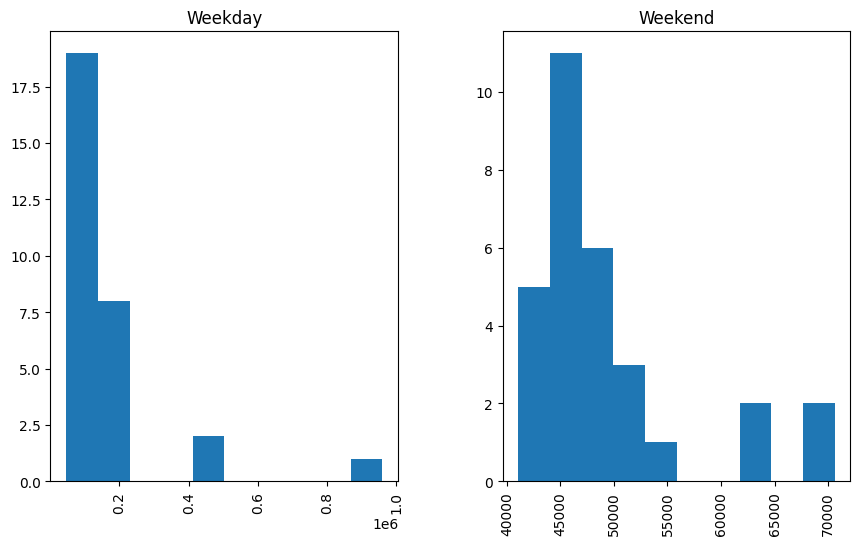

In [ ]:
max_data[['Fouriermax', 'Status Mingguan']].hist(by='Status Mingguan', figsize=(10, 6))
plt.show()

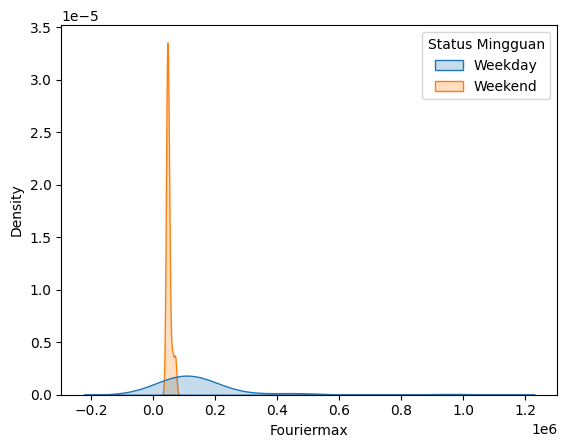

In [ ]:
sns.kdeplot(data=max_data, x='Fouriermax', hue='Status Mingguan', fill=True)
plt.show()

In [ ]:
weekend_data = max_data[max_data['Status Mingguan'] == 'Weekend']['Fouriermax']
weekday_data = max_data[max_data['Status Mingguan'] == 'Weekday']['Fouriermax']

ks_statistic, ks_p_value = ks_2samp(weekend_data, weekday_data)

print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {ks_p_value}")

alpha = 0.05
if ks_p_value < alpha:
    print("Menolak hipotesis nol: Distribusi data berbeda secara signifikan.")
else:
    print("Menerima hipotesis nol: Distirbusi data tidak berbeda secara signifikan.")

KS Statistic: 0.9
P-value: 5.78702423789193e-13
Menolak hipotesis nol: Distribusi data berbeda secara signifikan.


_"Berdasarkan hasil tersebut, diketahui bahwa histogram, density plot, dan KS-test dapat membedakan penggunakan konsumsi energi pada hari kerja dan hari libur dengan parameter fouriermax"_

#### **Analisis FFT**

### **4. *Reduction* Deminsion**

###**4.1. PCA *(Principal Component Analysis)***

In [ ]:
data = pd.read_csv('Steel_industry_data.csv')
print(data)

                   date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0      01/01/2018 00:15       3.17                                  2.95   
1      01/01/2018 00:30       4.00                                  4.46   
2      01/01/2018 00:45       3.24                                  3.28   
3      01/01/2018 01:00       3.31                                  3.56   
4      01/01/2018 01:15       3.82                                  4.50   
...                 ...        ...                                   ...   
35035  31/12/2018 23:00       3.85                                  4.86   
35036  31/12/2018 23:15       3.74                                  3.74   
35037  31/12/2018 23:30       3.78                                  3.17   
35038  31/12/2018 23:45       3.78                                  3.06   
35039  31/12/2018 00:00       3.67                                  3.02   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                            

In [ ]:
numerical_features = ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh',
                      'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']
categorical_features = ['WeekStatus', 'Day_of_week', 'Load_Type']

encoded_data = pd.get_dummies(data[numerical_features + categorical_features])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_data)

***Normalisasi Fitur:*** *Normalisasi adalah proses mengubah nilai-nilai fitur sehingga mereka memiliki skala seragam. Dalam konteks analisis data dan metode seperti PCA, normalisasi penting karena beberapa metode bergantung pada jarak atau perbedaan skala antar fitur.*
*   ***StandardScaler:*** *Menggunakan metode standarisasi, yaitu mengurangkan rata-rata dan membagi dengan deviasi standar dari setiap fitur. Hal ini menghasilkan fitur-fitur yang memiliki rata-rata nol dan deviasi standar satu.*





*   ***Tujuan Normalisasi:***
> *Memastikan bahwa setiap fitur berkontribusi setara terhadap analisis, terlepas dari besarnya nilai fitur tersebut.
Memastikan bahwa metode yang sensitif terhadap skala, seperti PCA, memberikan bobot yang seimbang pada setiap fitur.*

*   ***StandardScaler:***
> *Rumus Standarisasi: $$x'=(x-x^ˉ)/s$$*

*   ***Keuntungan Normalisasi:***
> *Meminimalkan risiko bahwa fitur dengan skala besar mendominasi perhitungan atau analisis.*
> *Membuat interpretasi model atau hasil analisis lebih mudah karena setiap fitur berada pada skala yang seragam.*

* ***Kontribusi pada PCA:***
> *Memastikan bahwa setiap komponen utama dipengaruhi oleh seluruh fitur dengan cara yang seimbang.*

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
final_df = pd.concat([principal_df, data['Load_Type']], axis=1)

print(final_df)

            PC1       PC2   Load_Type
0     -0.582113 -2.343951  Light_Load
1     -0.570923 -2.482046  Light_Load
2     -0.583018 -2.385650  Light_Load
3     -0.584499 -2.423900  Light_Load
4     -0.572770 -2.488947  Light_Load
...         ...       ...         ...
35035 -0.271658 -1.293826  Light_Load
35036 -0.246944 -1.071538  Light_Load
35037 -0.225096 -0.910078  Light_Load
35038 -0.219144 -0.866690  Light_Load
35039 -0.558281 -2.255598  Light_Load

[35040 rows x 3 columns]


_**Konteks Komponen Utama (Principal Components):**_
* _PC1 dan PC2: Menunjukkan nilai dari dua komponen utama yang dihasilkan dari analisis PCA. Setiap baris mewakili observasi tunggal dalam ruang dua dimensi yang dihasilkan oleh PCA._

_**Konteks Kolom 'Load_Type':**_
* _Load_Type: Menunjukkan jenis beban untuk setiap observasi. Dalam konteks industri baja, jenis beban mungkin merujuk pada karakteristik atau kondisi penggunaan peralatan, proses produksi, atau beban yang dikenakan pada sistem._

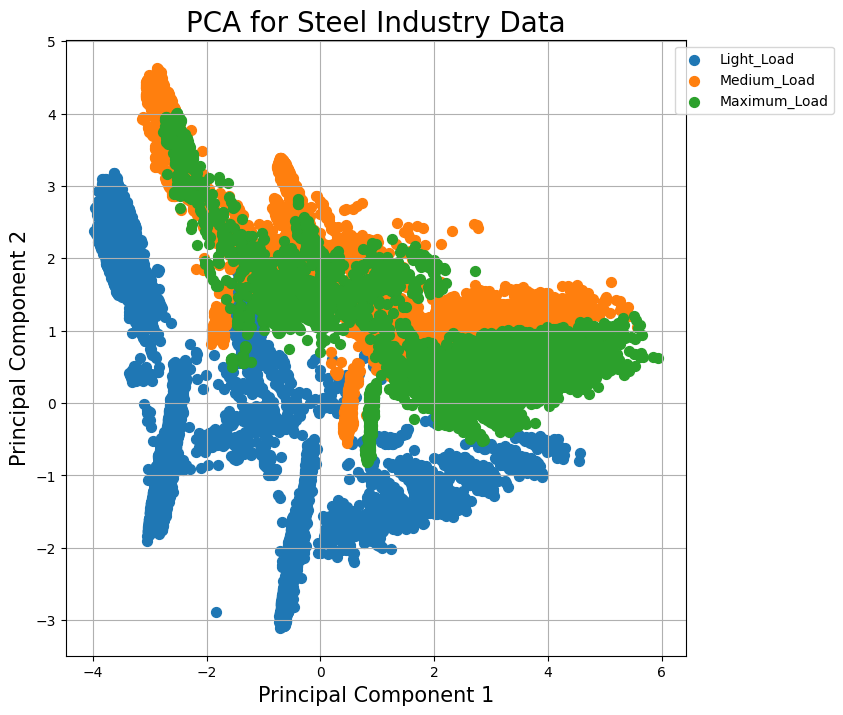

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('PCA for Steel Industry Data', fontsize=20)

load_types = final_df['Load_Type'].unique()

scatter_handles = []
for load_type in load_types:
    indices_to_keep = final_df['Load_Type'] == load_type
    scatter = ax.scatter(final_df.loc[indices_to_keep, 'PC1'],
                         final_df.loc[indices_to_keep, 'PC2'],
                         s=50,
                         label=load_type)
    scatter_handles.append(scatter)

ax.legend(handles=scatter_handles, loc='upper right', bbox_to_anchor=(1.25, 1))
ax.grid()
plt.show()

_"Jenis beban tertentu cenderung berkumpul bersama dan terpisah dari jenis beban lainnya, yang dimana hal ini menunjukkan adanya cluster atau pemisahan."_


In [ ]:
features = ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh',
            'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']

x_eigen = data.loc[:, features].values

cov_mat = np.cov(x_eigen, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eigh(cov_mat)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

covariance_matrix_df = pd.DataFrame(cov_mat, columns=features, index=features)
eigen_table = pd.DataFrame({'Eigenvalue': eigenvalues}, index=['Eigenvalue {}'.format(i+1) for i in range(len(eigenvalues))])
eigenvec_table = pd.DataFrame(eigenvectors, columns=['Eigenvector {}'.format(i+1) for i in range(len(eigenvalues))])

print("Covariance Matrix:\n", covariance_matrix_df)

print("\nEigenvalues:\n", eigen_table)

print("\nEigenvectors:\n", eigenvec_table)


Covariance Matrix:
                                           Usage_kWh  \
Usage_kWh                               1118.526534   
Lagging_Current_Reactive.Power_kVarh     488.710021   
Leading_Current_Reactive_Power_kVarh     -80.680208   
CO2(tCO2)                                  0.533769   
Lagging_Current_Power_Factor             244.240368   
Leading_Current_Power_Factor             360.142005   
NSM                                   195693.330360   

                                      Lagging_Current_Reactive.Power_kVarh  \
Usage_kWh                                                       488.710021   
Lagging_Current_Reactive.Power_kVarh                            265.885635   
Leading_Current_Reactive_Power_kVarh                            -49.047784   
CO2(tCO2)                                                         0.233582   
Lagging_Current_Power_Factor                                     44.593156   
Leading_Current_Power_Factor                                    202.481

In [ ]:
covariance_matrix_df = pd.DataFrame(cov_mat, columns=features, index=features)
eigen_table_combined = pd.DataFrame({'Eigenvalue': eigenvalues}, index=['Eigen {}'.format(i+1) for i in range(len(eigenvalues))])
eigenvec_table = pd.DataFrame(eigenvectors, columns=['Eigenvector {}'.format(i+1) for i in range(len(eigenvalues))])

half_num_features = len(covariance_matrix_df.columns) // 2
covariance_matrix_df_part1 = covariance_matrix_df.iloc[:, :half_num_features]
covariance_matrix_df_part2 = covariance_matrix_df.iloc[:, half_num_features:]
eigenvec_table_part1 = eigenvec_table.iloc[:, :half_num_features].copy()
eigenvec_table_part2 = eigenvec_table.iloc[:, half_num_features:].copy()

print("Covariance Matrix (Part 1):\n", covariance_matrix_df_part1)
print("\nCovariance Matrix (Part 2):\n", covariance_matrix_df_part2)

print("\nEigenvalues:\n", eigen_table_combined)

print("\nEigenvectors (Part 1):\n", eigenvec_table_part1)
print("\nEigenvectors (Part 2):\n", eigenvec_table_part2)

Covariance Matrix (Part 1):
                                           Usage_kWh  \
Usage_kWh                               1118.526534   
Lagging_Current_Reactive.Power_kVarh     488.710021   
Leading_Current_Reactive_Power_kVarh     -80.680208   
CO2(tCO2)                                  0.533769   
Lagging_Current_Power_Factor             244.240368   
Leading_Current_Power_Factor             360.142005   
NSM                                   195693.330360   

                                      Lagging_Current_Reactive.Power_kVarh  \
Usage_kWh                                                       488.710021   
Lagging_Current_Reactive.Power_kVarh                            265.885635   
Leading_Current_Reactive_Power_kVarh                            -49.047784   
CO2(tCO2)                                                         0.233582   
Lagging_Current_Power_Factor                                     44.593156   
Leading_Current_Power_Factor                                  

In [ ]:
x_eigen = data.loc[:, features].values

x_eigen_standard = StandardScaler().fit_transform(x_eigen)

cov_mat_standard = np.cov(x_eigen_standard, rowvar=False)

eigenvalues_standard, eigenvectors_standard = np.linalg.eigh(cov_mat_standard)

sorted_indices = np.argsort(eigenvalues_standard)[::-1]
eigenvalues_standard = eigenvalues_standard[sorted_indices]
eigenvectors_standard = eigenvectors_standard[:, sorted_indices]

covariance_matrix_df_standard = pd.DataFrame(cov_mat_standard, columns=features, index=features)
eigen_table_standard = pd.DataFrame({'Eigenvalue': eigenvalues_standard}, index=['Eigenvalue {}'.format(i+1) for i in range(len(eigenvalues_standard))])
eigenvec_table_standard = pd.DataFrame(eigenvectors_standard, columns=['Eigenvector {}'.format(i+1) for i in range(len(eigenvalues_standard))])

print("Covariance Matrix (Standardized):\n", covariance_matrix_df_standard)
print("\nEigenvalues (Standardized):\n", eigen_table_standard)
print("\nEigenvectors (Standardized):\n", eigenvec_table_standard)


Covariance Matrix (Standardized):
                                       Usage_kWh  \
Usage_kWh                              1.000029   
Lagging_Current_Reactive.Power_kVarh   0.896175   
Leading_Current_Reactive_Power_kVarh  -0.324931   
CO2(tCO2)                              0.988208   
Lagging_Current_Power_Factor           0.385971   
Leading_Current_Power_Factor           0.353576   
NSM                                    0.234617   

                                      Lagging_Current_Reactive.Power_kVarh  \
Usage_kWh                                                         0.896175   
Lagging_Current_Reactive.Power_kVarh                              1.000029   
Leading_Current_Reactive_Power_kVarh                             -0.405153   
CO2(tCO2)                                                         0.886973   
Lagging_Current_Power_Factor                                      0.144538   
Leading_Current_Power_Factor                                      0.407728   
NSM       

In [ ]:
half_num_features = len(covariance_matrix_df_standard.columns) // 2
covariance_matrix_df_standard_part1 = covariance_matrix_df_standard.iloc[:, :half_num_features]
covariance_matrix_df_standard_part2 = covariance_matrix_df_standard.iloc[:, half_num_features:]
eigenvec_table_standard_part1 = eigenvec_table_standard.iloc[:, :half_num_features].copy()
eigenvec_table_standard_part2 = eigenvec_table_standard.iloc[:, half_num_features:].copy()

eigen_table_combined_standard = pd.DataFrame({'Eigenvalue': eigenvalues_standard}, index=['Eigen {}'.format(i+1) for i in range(len(eigenvalues_standard))])

print("Covariance Matrix (Standardized - Part 1):\n", covariance_matrix_df_standard_part1)
print("\nCovariance Matrix (Standardized - Part 2):\n", covariance_matrix_df_standard_part2)

print("\nEigenvalues (Standardized):\n", eigen_table_combined_standard)

print("\nEigenvectors (Standardized - Part 1):\n", eigenvec_table_standard_part1)
print("\nEigenvectors (Standardized - Part 2):\n", eigenvec_table_standard_part2)


Covariance Matrix (Standardized - Part 1):
                                       Usage_kWh  \
Usage_kWh                              1.000029   
Lagging_Current_Reactive.Power_kVarh   0.896175   
Leading_Current_Reactive_Power_kVarh  -0.324931   
CO2(tCO2)                              0.988208   
Lagging_Current_Power_Factor           0.385971   
Leading_Current_Power_Factor           0.353576   
NSM                                    0.234617   

                                      Lagging_Current_Reactive.Power_kVarh  \
Usage_kWh                                                         0.896175   
Lagging_Current_Reactive.Power_kVarh                              1.000029   
Leading_Current_Reactive_Power_kVarh                             -0.405153   
CO2(tCO2)                                                         0.886973   
Lagging_Current_Power_Factor                                      0.144538   
Leading_Current_Power_Factor                                      0.407728   
N

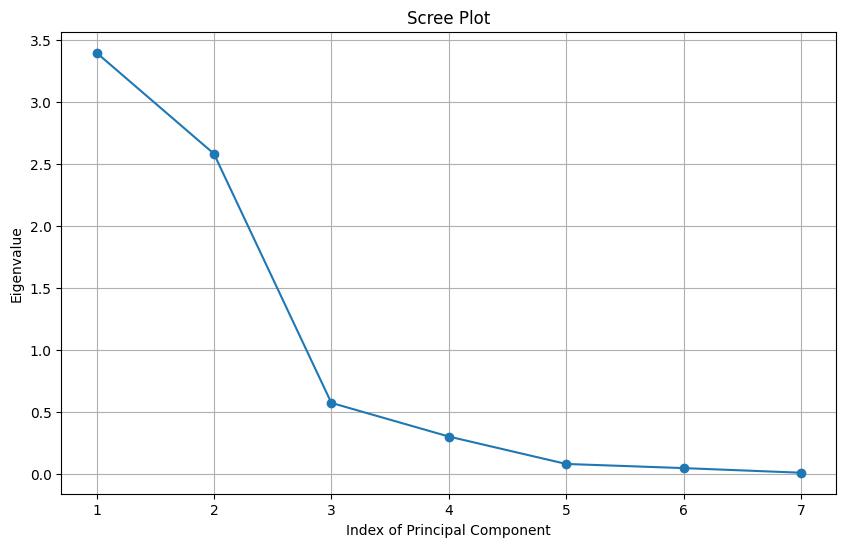

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues_standard) + 1), eigenvalues_standard, marker='o')
plt.title('Scree Plot')
plt.xlabel('Index of Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

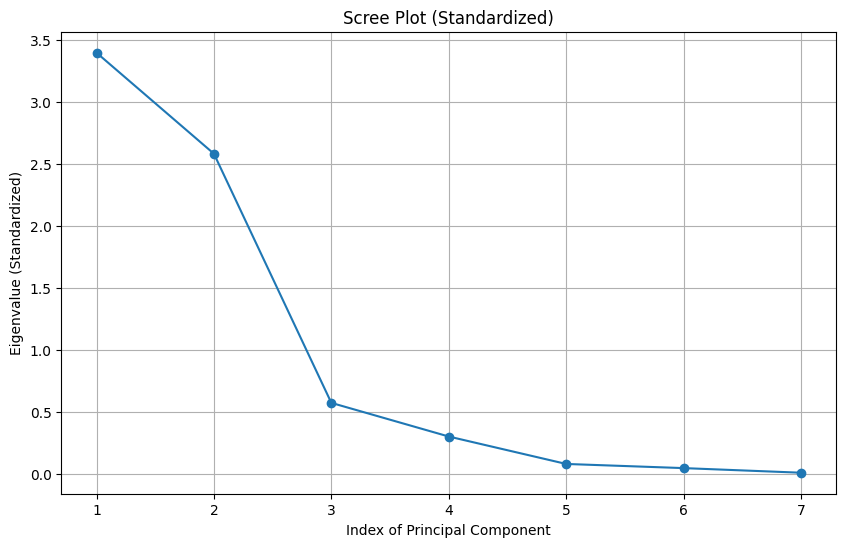

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues_standard) + 1), eigenvalues_standard, marker='o')
plt.title('Scree Plot (Standardized)')
plt.xlabel('Index of Principal Component')
plt.ylabel('Eigenvalue (Standardized)')
plt.grid(True)
plt.show()

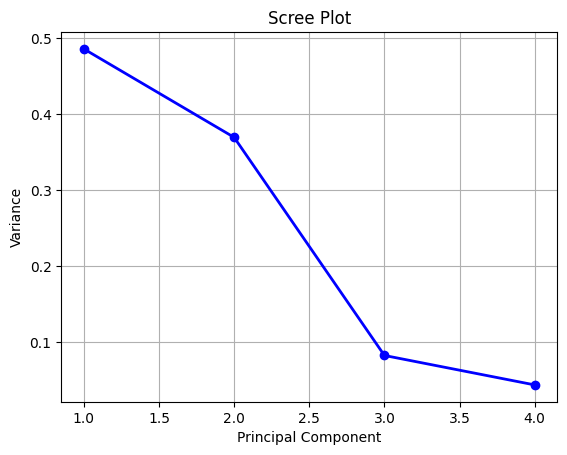

In [ ]:
x = data.loc[:, features].values

x_standard = StandardScaler().fit_transform(x)

pca_var = PCA(n_components=4)
pca_fit_var = pca_var.fit(x_standard)

explained_variance_ratio = pca_var.explained_variance_ratio_

PC_values = np.arange(pca_var.n_components) + 1
plt.plot(PC_values, explained_variance_ratio, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance')
plt.grid()
plt.show()

In [ ]:
print("Explained Variance Ratio for each Principal Component:")
for i, ratio in enumerate(explained_variance_ratio, start=1):
    print(f"Principal Component {i}: {ratio:.4f}")

Explained Variance Ratio for each Principal Component:
Principal Component 1: 0.4854
Principal Component 2: 0.3690
Principal Component 3: 0.0821
Principal Component 4: 0.0433


* _"PC1 menjelaskan sekitar 48.54% variasi data, diikuti oleh PC2 dengan 36.90%. Kedua komponen utama ini memberikan gambaran signifikan tentang struktur data."_

* _"PC3 dan PC4, meskipun memiliki kontribusi lebih rendah, masih relevan untuk pemahaman variasi tambahan sebesar 8.21% dan 4.33% masing-masing."_

In [ ]:
x = data.loc[:, features].values

x_standard = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_standard)

loadings = pd.DataFrame(pca.components_.T, columns=['Principal Component 1', 'Principal Component 2'], index=features)

print("Loadings of Features on Principal Components:")
print(loadings)

Loadings of Features on Principal Components:
                                      Principal Component 1  \
Usage_kWh                                          0.499072   
Lagging_Current_Reactive.Power_kVarh               0.494964   
Leading_Current_Reactive_Power_kVarh              -0.352806   
CO2(tCO2)                                          0.499154   
Lagging_Current_Power_Factor                       0.036484   
Leading_Current_Power_Factor                       0.361654   
NSM                                                0.013676   

                                      Principal Component 2  
Usage_kWh                                          0.223565  
Lagging_Current_Reactive.Power_kVarh               0.108328  
Leading_Current_Reactive_Power_kVarh               0.426152  
CO2(tCO2)                                          0.218914  
Lagging_Current_Power_Factor                       0.562531  
Leading_Current_Power_Factor                      -0.417594  
NSM            

In [ ]:
def perform_sampling(data, sample_size):
    sampled_data = data.sample(sample_size, random_state=42)
    return sampled_data

modelling_data_f = pd.read_csv("Steel_industry_data.csv")

modelling_data_f['date'] = pd.to_datetime(modelling_data_f['date'], format='%d/%m/%Y %H:%M')

modelling_data_f = modelling_data_f.sort_values(by='date')

modelling_data_f['gradient'] = modelling_data_f['Usage_kWh'].diff() / modelling_data_f['date'].diff().dt.total_seconds() * 60 * 15

gradmax_per_day_f = modelling_data_f.groupby(modelling_data_f['date'].dt.date)['gradient'].max().reset_index()

gradmax_per_day_f.columns = ['Hari ke-', 'Gradmax']

gradmax_per_day_f['Hari ke-'] = range(1, len(gradmax_per_day_f) + 1)

sample_size = 100
sampled_data = perform_sampling(gradmax_per_day_f, sample_size)

table = tabulate(
    {key: round(value, 4) for key, value in sampled_data.items()},
    headers='keys',
    tablefmt='pretty',
    showindex=False,
)

print("Sampled Data:")
print(table)

Sampled Data:
+----------+---------+
| Hari ke- | Gradmax |
+----------+---------+
|   194    |  29.06  |
|    34    |  25.16  |
|    16    |  68.33  |
|   310    |  39.46  |
|    58    |  44.75  |
|   184    |  33.51  |
|    77    |  0.68   |
|   120    |  59.07  |
|   153    |  19.26  |
|   127    |  86.43  |
|   339    |  33.91  |
|    40    |  49.57  |
|   305    |  61.02  |
|    56    |  63.33  |
|   138    |  72.11  |
|   301    |  1.54   |
|    1     |  0.83   |
|   276    |  39.24  |
|   330    |  50.51  |
|   102    |  72.11  |
|    10    |  87.52  |
|   166    |  45.04  |
|    73    |  55.04  |
|   254    |  54.14  |
|   249    |  28.91  |
|   196    |  48.68  |
|   221    |  60.63  |
|   293    |  61.52  |
|   350    |  35.39  |
|   362    |  35.24  |
|    26    |  92.67  |
|   109    |  42.12  |
|    43    |  63.0   |
|   353    |  62.82  |
|   197    |  57.99  |
|   115    |  57.31  |
|    64    |  58.93  |
|    23    |  67.28  |
|   343    |  0.61   |
|   332    |  52.6  

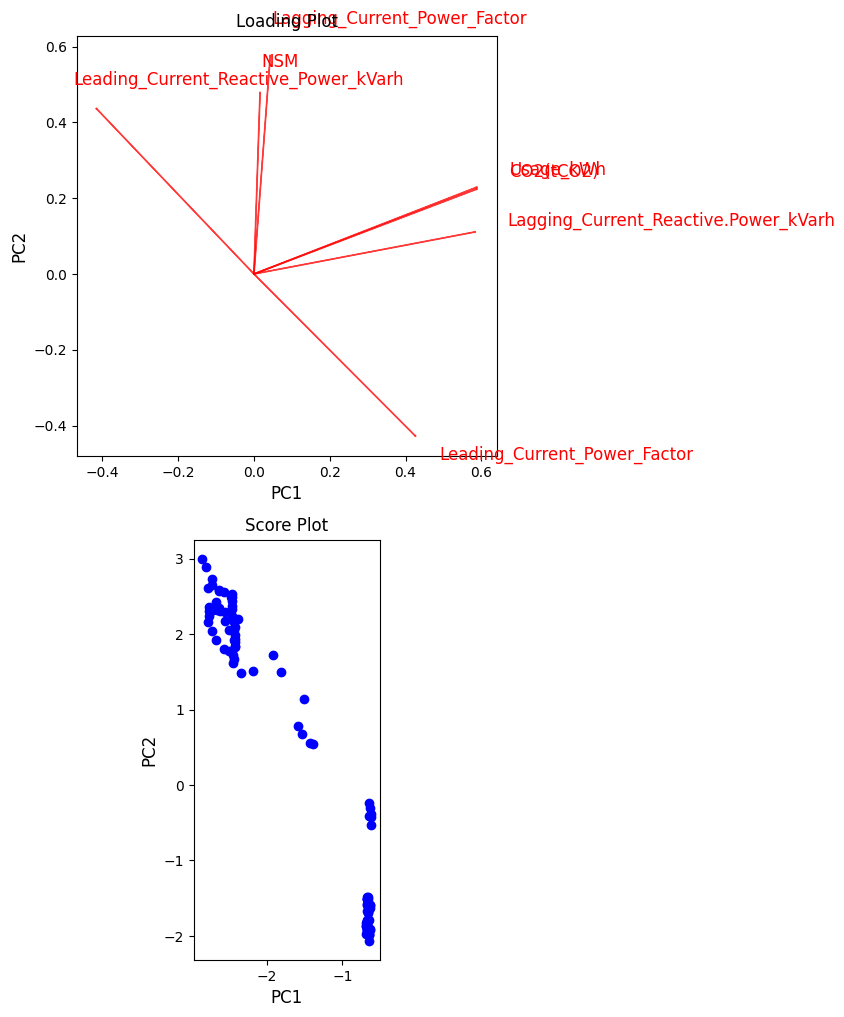

In [ ]:
def plot_biplot_with_loading_and_score(sampled_data, principal_components, loadings):
    scalePC1 = 1.0 / (loadings['Principal Component 1'].max() - loadings['Principal Component 1'].min())
    scalePC2 = 1.0 / (loadings['Principal Component 2'].max() - loadings['Principal Component 2'].min())

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12))

    # Plot Loading Plot
    for i, feature in enumerate(loadings.index):
        color = 'blue' if feature.startswith('B') else 'red'
        ax1.arrow(0, 0, loadings.loc[feature, 'Principal Component 1'] * scalePC1,
                 loadings.loc[feature, 'Principal Component 2'] * scalePC2, color=color, alpha=0.7)
        ax1.text(loadings.loc[feature, 'Principal Component 1'] * 1.15 * scalePC1,
                loadings.loc[feature, 'Principal Component 2'] * 1.15 * scalePC2, feature, fontsize=12, color=color)

    ax1.set_xlabel('PC1', fontsize=12)
    ax1.set_ylabel('PC2', fontsize=12)
    ax1.set_title('Loading Plot', fontsize=12)

    # Plot Score Plot
    for i, (pc1, pc2, gradmax) in enumerate(zip(principal_components[:, 0], principal_components[:, 1], sampled_data['Gradmax'])):
      label = 'B' if gradmax >= 0 else 'R'
      color = 'blue' if label == 'B' else 'red'
      ax2.scatter(pc1, pc2, label=label, color=color)

    ax2.set_xlabel('PC1', fontsize=12)
    ax2.set_ylabel('PC2', fontsize=12)
    ax2.set_title('Score Plot', fontsize=12)

    ax1.set_aspect('equal', adjustable='box')
    ax2.set_aspect('equal', adjustable='box')

    plt.subplots_adjust(wspace=0.4)

    handles, labels = ax2.get_legend_handles_labels()
    plt.show()

plot_biplot_with_loading_and_score(sampled_data, principal_components, loadings)

In [ ]:
print(sampled_data.columns)


Index(['Hari ke-', 'Gradmax'], dtype='object')


In [ ]:
pca_95 = PCA(0.95)
principalComponents_95 = pca_95.fit_transform(x_standard)
print(principalComponents_95.shape)

(35040, 4)


In [ ]:
n_components_95 = pca_95.n_components_

In [ ]:
pca_95 = PCA(n_components=3)
principalComponents_95 = pca_95.fit_transform(x_standard)
print(principalComponents_95.dtype)

float64


In [ ]:
implied_shape = (len(data), n_components_95 + 1)
print(implied_shape)

(50, 5)


In [ ]:
pca_95 = PCA(n_components=3)
principalComponents_95 = pca_95.fit_transform(x_standard)

principalDf_95 = pd.DataFrame(data=principalComponents_95, columns=[f'principal component {i+1}' for i in range(3)])

finalDf_95 = pd.concat([principalDf_95, data[['Label']]], axis=1)

print(finalDf_95)


       principal component 1  principal component 2  principal component 3  \
0                  -0.691277              -1.824022              -0.786852   
1                  -0.644980              -1.983060              -0.730667   
2                  -0.684878              -1.874780              -0.707725   
3                  -0.679064              -1.920715              -0.664398   
4                  -0.648924              -1.994406              -0.622464   
...                      ...                    ...                    ...   
35035              -0.599666              -0.604090               2.085257   
35036              -0.618209              -0.339442               2.067251   
35037              -0.626589              -0.146116               2.058637   
35038              -0.629452              -0.094727               2.081081   
35039              -0.678016              -1.713550              -0.853223   

      Label  
0         A  
1         A  
2         A  
3      

In [ ]:
import plotly.express as px

fig = px.scatter_3d(finalDf_95, x='principal component 1', y='principal component 2', z='principal component 3', color='Label')
fig.show()

###**4.2. LDA *(Linear Discriminant Analysis)***

In [ ]:
data = pd.read_csv('Steel_industry_data.csv')
print(data.columns)

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')


In [ ]:
data['Total_Power'] = data['Usage_kWh'] + data['CO2(tCO2)']
print(data.head())

               date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.

In [ ]:
total_observations = len(data.index)
print(f"Total observations in the dataset: {total_observations}")

Total observations in the dataset: 35040


In [ ]:
X = data[['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
          'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
          'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'Total_Power']]
y = data['Load_Type']

model = LinearDiscriminantAnalysis()
model.fit(X, y)

LinearDiscriminantAnalysis()

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(f"Mean accuracy: {np.mean(scores)}")

Mean accuracy: 0.7331145357686455


In [ ]:
new_observation = [3.5, 4.0, 2.0, 0.5, 0.0, 0.0, 0.0, 0.0]

predicted_class = model.predict([new_observation])
print(f"Predicted class for the new observation: {predicted_class}")

Predicted class for the new observation: ['Light_Load']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names



* _"Melakukan prediksi kelas menggunakan suatu model machine learning untuk mengetahui kelas prediksi untuk suatu data baru."_
* _"Data baru yang diberikan dalam variabel new_observation memiliki dimensi 8. Masing-masing nilai merepresentasikan fitur-fitur dari suatu entitas atau objek, dan dapat digunakan untuk membuat prediksi berdasarkan model yang sudah dilatih."_
* _"Dengan menggunakan model machine learning yang telah dilatih (model), code ini memprediksi kelas atau label dari data baru (new_observation)."_
* _"Prediksi dilakukan dengan memanggil metode predict pada model, dan hasilnya disimpan dalam variabel predicted_class."_

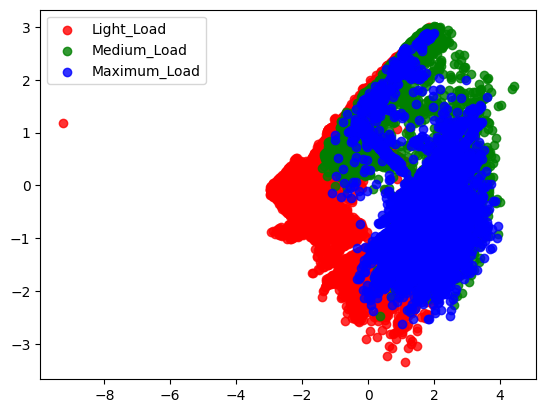

In [ ]:
data_plot = model.fit(X, y).transform(X)
target_names = data['Load_Type'].unique()

plt.figure()
colors = ['red', 'green', 'blue']
lw = 2
for color, target_name in zip(colors, target_names):
    plt.scatter(data_plot[y == target_name, 0], data_plot[y == target_name, 1], alpha=.8, color=color,
                label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()

## **E. Kesimpulan**


1.   Pada eksplorasi data, semua _feature_ tidak terdistribusi normal
2.   Semua feature data memiliki _outlier_, kecuali NSM (Number of Seconds from Midnight)
3.   Pada dataset "Steel_industry_data.csv," semakin besar rerata suatu feature akan membuat keragaman distribusi suatu data meningkat. Dalam hal ini, data dengan keragaman tertinggi yaitu NSM (24940.53), sedangkan keragaman terendah yaitu $CO_{2}$ (0.02)
4.   Aktivitas industri rata-rata terjadi pada hari kerja dengan persentase 71,5%
5.   Pada saat dataset ini diambil, industri memiliki aktivitas dominan dengan beban ringan pada persentase
51,6%, sedangkan aktivitas beban maksimum dengan persentase 20,8% tergolong terendah jika dibandingkan beban ringan dan menengah
6.   Efisiensi industri terbaik terjadi pada hari libur karena jumlah bebannya ringan yang berarti konsumsi energi juga rendah. Begitupula sebaliknya, efisiensi industri terburuk terjadi pada hari kerja
7.   Pemodelan terbaik dilakukan dengan metode FFT dan IFFT dengan RMSE (_Root Mean Square Error_) $7.362551965828097x10^{-15}$
8.   Aktivitas industri pada hari kerja dan libur dapat terbedakan secara signifikan dengan menggunakan parameter gradmax (gradien maksimum) dan fouriermax (koefisien fourier maksimum dengan FFT)
9. PCA membantu mengidentifikasi dimensi utama yang menjelaskan variasi dalam data industri baja. Komponen utama, terutama PC1 dan PC2, memiliki nilai eigenvalue tinggi, menunjukkan signifikansi dalam menjelaskan variasi.
10. Komponen utama yang dihasilkan (PC1, PC2, PC3) menjelaskan sebagian besar variasi dalam data.
11. Scatter plot 3D dari hasil PCA menunjukkan kemampuan untuk membedakan kelas atau label berdasarkan pola distribusi di ruang fitur tereduksi.
12. Kombinasi PCA dan LDA memberikan pendekatan komprehensif untuk analisis steel industry data, merinci pola variasi, dan membedakan kelas-kelas yang ada. Selain itu, membantu dalam pengambilan keputusan dan perencanaan efisiensi.


## **F. Referensi (Daftar Pustaka)**
---
1.   Sathishkumar V E, Changsun Shin, Yongyun Cho. _"Efficient energy consumption prediction model for a data analytic-enabled industrial building in a smart city."_ Building Research & Information, Vol. 49. no. 1 (2021): 127-143.
2.   https://archive.ics.uci.edu/dataset/851/steel+industry